In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
import seaborn as sb
import scipy
from scipy import stats

In [24]:
N_c=100  #NUMBER OF CONFIGURATION
N=600 #NUMBER OF WALKERS in each configuration there are 600 R
D = (197.3269804)**2/2/939.56542052 
tau=0.001
sigma=math.sqrt(2*D*tau)
h = 0.00001
step=0.6
A=4
E0=-26 #MeV  '-28'funziona bene, '-27' non lo so

In [3]:
BestPars = [0.08597 , -0.7191 , 2.13796 ]  #sono gamma, a e beta!!
Bestpar = np.array(BestPars)

Pars = [0.2, -0.2, 1] #Questi cosa sono? come mai vengono usati nella WF al posto di gamma, a e beta? 
Par = np.array(Pars)

Par_new = np.zeros(3)

In [4]:
# Generation of the Position Matrix

#Why this form?
R = (np.random.rand(3,A)-0.5)*10*step # Coordinates Matrix (number from -3 to 3)
print(R)
print(R[0,0])
print(R[1,0])
#print(WF2(R,Par,1))

[[ 0.03397165 -0.11726507 -1.09803826  2.78756446]
 [-2.72476098 -1.30905267  2.57390826 -0.64917636]
 [-0.51549344 -2.14791251 -0.36157215 -0.42185637]]
0.033971646816024936
-2.7247609801348287


In [5]:
def Diff (R, i, j, h, Par):
  R_P = R.copy()
  R_M = R.copy()
  R_P[i,j] = R[i,j]+h
  R_M[i,j] = R[i,j]-h
  return (WF(R_P, Par)+WF(R_M, Par)-2*WF(R, Par))/h**2 

In [6]:
def V(R):
  V = 0
  for i in range(0,A-1):
    for j in range(i+1,A):
      V = V + 1000*math.exp(-3*d(R,i,j))-165.35*math.exp(-1.05*d(R,i,j))-21.5*math.exp(-0.6*d(R,i,j))-83*math.exp(-0.8*d(R,i,j))-11.5*math.exp(-0.4*d(R,i,j))
  return V
#print(V(R))

In [7]:
def K(R, Par):
  K = 0 
  for j in range(0,A):
    for i in range(0,3):
      K = K + Diff(R, i, j, h, Par )*D
  return K
#print(K(R,Par))

In [8]:
#modificalo, devi fare vettore per vettore, quindi fare un ciclo for fino a 4 e aggironare
def diffuse(R,D,tau):
    Rnew = R + gaussrand()*math.sqrt(2*D*tau)
    return(Rnew)
#D*tau*driftF(Grad,i,j,h,WF,R,Par) was present, but I don't know how to add it

In [9]:
#sarebbe 'eta'
def gaussrand():
    rand= np.random.normal(0,sigma,3)
    return(rand)

In [10]:
print(gaussrand())
#print(diffuse(R,D,tau))

[0.22709611 0.21338702 0.06413112]


In [11]:
# Definition of a distance funtion

def d(R,i,j):
  d = (R[0,i]-R[0,j])**2 + (R[1,i]-R[1,j])**2 +(R[2,i]-R[2,j])**2
  return d
print(d(R,1,1))

0.0


In [12]:
def WF(R, Par):
  wf = 1
  for i in range(0,A-1):
    for j in range(i+1,A):
      wf = wf * (math.exp(-Par[0]*d(R,i,j))+Par[1]*math.exp(-Par[2]*d(R,i,j)))
  #print("Eigenfunction value is = ", wf)     
  return wf 

In [13]:
def WF2(R, Par,numeronucleone):
  wf = 1
  for i in range(3):
        wf = wf * (math.exp(-Par[0]*d(R,i,numeronucleone))+Par[1]*math.exp(-Par[2]*d(R,i,numeronucleone)))
        print(i)
        print(wf)
  #print("Eigenfunction value is = ", wf)     
  return wf 
#corretta forse,
#Moltiploica le wf solo per un singolo nucleone, x,y,z, ma non era quello che volevo!!!

In [14]:
def wf(R,i,numeronucleone):
    wfan=(math.exp(-Bestpar[0]*d(R,i,numeronucleone))+Bestpar[1]*math.exp(-Bestpar[2]*d(R,i,numeronucleone)))
    return wfan
print(wf(R,2,2))
print(wf(R,1,1))

0.28090000000000004
0.28090000000000004


In [15]:
#GRADIENTE DELLA TRIAL FUNCTION
def drifunction(R):
    list_F=[]
    def Fall(R):
        for i in range(3):
            for numeronucleone in range(A):
                R_P = R.copy()
                R_M = R.copy()
                R_P[i,numeronucleone] = R[i,numeronucleone]+h
                R_M[i,numeronucleone] = R[i,numeronucleone]-h
            
                list_F.append((wf(R_P,i,numeronucleone)-wf(R_M,i,numeronucleone))/wf(R,i,numeronucleone))
            #print(wf(R,i,numeronucleone))
    #f=np.reshape(list_F, (3, 4))
    #print(f)
        return(list_F)

    Fall(R)
#print(list_F)
    f=np.reshape(list_F,(3,4))
    #print(f)
    return(f)
#print(f)
#NON VA BENE PERCHè QUELLI CON LO STESSO INDICE (O,O) (1,1) (2,2) HANNO VARIAZIONE NULLA, MA 
#FACCIAMO FINTA CHE VADA BENE, ANDIAMO AVANTI


In [23]:
def shifting(i):
    Rnewest=np.zeros((3,4))
    fun=drifunction(list_R[i])
    for nucleon in range(A):
        Rnewest[:,nucleon]=list_R[i][:,nucleon] + D*tau*fun[:,nucleon] + math.sqrt(2*D*tau)*gaussrand()
    return(Rnewest)

shifting(1)
print(list_R[1])
print(shifting(1))
#OK FUNZIONA, SEMBREREBBE
#FUNZIONA MA CON LA LIST_R
#TUTTAVIA MI SERVE CHE LA LIST_R VENGA UPLODATA ALL'INTERNO DI FUNZIONI, QUINDI NON UTILIZZERØ QUESTA FUNZIONE
#È UTILIZZATA SOLO NEL PRIMO PROTOTIPO

[[ 1.76416311  1.23273707 -1.57479133  1.5877656 ]
 [ 0.02801077  1.75785151 -1.01769023 -2.03971432]
 [-1.4440407  -2.90846028 -1.58434406  1.06675054]]
[[ 1.68859641  1.26507678 -1.58201729  1.5413921 ]
 [ 0.04346071  1.75547129 -1.00028162 -2.09777295]
 [-1.40532452 -2.91391531 -1.62268539  1.0390127 ]]


In [16]:
#i I HAVE DONE THIS BECAUSE WAS ASKED BY THE PDF OF RICCARDO (1/1) REFERS TO THE RATIO BETWEEN GREEN FUNCTIONS
def rattio(Rnewest):
    rat=((WF(Rnewest,Bestpar))**2/(WF(R,Bestpar))**2)*((1)/(1))
    return(rat)

#WHAT TO DO WITH THE GREEN FUNTIONS????
#THEN YOU HAVE TO DO THE METROPOLIS QUESTION

In [17]:
def Elocale(R,Bestpars):
    Eloc= (V(R) - K(R,Bestpar)/WF(R,Bestpar))
    return(Eloc)

In [18]:
#NOW I AM GOING TO FOLLOW THE GUARDIOLA PDF
def replication_factor(Rnewest):
    factor=np.exp(-tau*((Elocale(R,Bestpar)/2)+(Elocale(Rnewest,Bestpar)/2)-E0))
    fact=math.floor(factor + np.random.rand())
    return(fact)
#IN TEH PDF OF RICCARDO INSERT ALSO A RANDOM NUMBER IN THE PARTE INTERA, MA NON HA IN CONFRONTO CON ELOCALE(R')
#NEL FILE INVECE METTE UN -TAU E COMUNQUE INSERISCE UN NUMERO RANDOM IN 'FACT'

In [19]:
def P_b(Rnewest):
    prob=np.exp(-tau*((Elocale(R,Bestpar)/2)+(Elocale(Rnewest,Bestpar)/2)-E0))
    return(prob)

In [21]:

    list_R = []
    list_R.append(R)
    E_ltotal=0
    E_lacc=0
    NA=0
    NIC=0
    for k in range(0,800):
        R_new = R.copy() + step*(np.random.rand(3,A)-0.5)
        if ((WF(R_new, Bestpar)/WF(R, Bestpar))**2>1 or (WF(R_new, Bestpar)/WF(R, Bestpar))**2 > np.random.rand() ):
            R = R_new.copy()
            list_R.append(R)
            NA = NA +1
            E_lacc=E_lacc + V(R) - (K(R,Bestpar)/WF(R,Bestpar))
        #else:              # MI SA CHE VA LEVATO QUESTO ELSE
            #R = R.copy()
            #list_R.append(R)
        NIC=NIC+1
        E_ltotal=E_ltotal + V(R) - (K(R,Bestpar)/WF(R,Bestpar))
        
        #questo codice cambia irreversibilmente il valore di R
        #ad ogni ciclo, cioè il punto di partenza casuale

In [22]:
for i in range(0,10):
    print(list_R[i])
print('--------')
for u in range(45,55):
    print(list_R[u])
print('--------')
for t in range(120,130):
    print(list_R[t])

[[ 1.71992833  0.94342705 -1.68997547  1.6971724 ]
 [-0.03405921  1.97400303 -1.04042954 -1.92696703]
 [-1.2941998  -2.96486139 -1.75755554  1.21027346]]
[[ 1.76416311  1.23273707 -1.57479133  1.5877656 ]
 [ 0.02801077  1.75785151 -1.01769023 -2.03971432]
 [-1.4440407  -2.90846028 -1.58434406  1.06675054]]
[[ 1.79883631  1.33619091 -1.35316427  1.4814225 ]
 [-0.08128051  1.85459171 -1.16154362 -2.12477075]
 [-1.55827359 -2.89238736 -1.54740528  0.97701099]]
[[ 2.09693655  1.27171061 -1.25559548  1.66465366]
 [-0.22727269  1.66365042 -1.25363757 -2.20664404]
 [-1.35776491 -2.87402807 -1.60996798  0.96854528]]
[[ 2.00212586  1.48897821 -1.07046027  1.51728126]
 [-0.4653178   1.79889307 -0.99596109 -2.16178015]
 [-1.16596253 -2.90442267 -1.51092899  0.7410078 ]]
[[ 2.27985311  1.23941702 -0.84711755  1.52725584]
 [-0.328083    1.59729682 -1.21084976 -2.22632936]
 [-1.43834221 -2.97301393 -1.54800816  0.80285291]]
[[ 2.29667254  1.08094787 -0.64557419  1.48648032]
 [-0.12768089  1.69963422

In [24]:
print(NA)
print(NIC)
print('The acceptance is: ', 100*NA/NIC , '%')

609
800
The acceptance is:  76.125 %


In [ ]:
#NOW I HAVE TO PUT ALL TOGHETER
#AND ALSO HAVE TO CLARIFY THE F(R)
#AND TO BETTER UNDERSTAND WHAT I AM DOING
#AND TO BETTER UNDERSTAND WHICH ONE OF THE THREE METHOD I HAVE TO FOLLOW

In [ ]:
#NOW I HAVE TO MAKE A BIG CALCULATION OF FOR CICLE TO GOT THE ENERGY COMPUTATION
#BUT I THINK I HAVE ALL THE FUNCTION I NEED
#REMEBER WHEN TO RUN TO RUN THE LOWER FUNCTION OF: DIFF, V, K. THAT ARE NOT REPORTED UP TO HERE.

In [35]:
#QUESTO È DA BUTTARE


#------------------------------------------------
#ci sono N_c = 100 configurazioni
    #in ogni configurazione ci sono numbofwaker walkers(matrici)
        #in ogni matrice devo applicare la variazione di posizione
        
list_Energytot=[]
list_position=[]
numbofwalkers=200
nucleons=A
#for configuration in range(100):
    
    for walker in range(numbofwalkers):
        #list_R[walker]
        for nucl in range(nucleons):  #nucleon=4=A 
            P=np.zeros((3,4))
            for nucleon in range(A):
                    Rnewest[:,nucleon]=R[:,nucleon] + D*tau*f[:,nucleon] + math.sqrt(2*D*tau)*gaussrand()
            
                    rat=((WF(P,Bestpar))**2/(WF(R,Bestpar))**2)*((1)/(1))
            
            #Metropolis question??
            
            factor=np.exp(-tau*((V(R) - K(R,Bestpar)/WF(R,Bestpar))/2)+((V(P) - K(P,Bestpar)/WF(P,Bestpar))/2)-E0)
            n=math.floor(factor + np.random.rand())
            
            for i in range(n):
                list_Energytot.append((V(P) - K(P,Bestpar)/WF(P,Bestpar)))
    
    
final=sum(list_Energytot)/(100*numbofwalkers)

IndentationError: unexpected indent (2301400264.py, line 11)

In [104]:
#QUESTO È DA BUTTARE

print(final)

0.0


In [24]:
#UNO
#-----------
#*******QUESTO COMUNQUE FUNZIONA SOLO CON UN UNICA list_R, CON UNA SOLA CONFIGURAZIONE********
#*****HA MOLTE COSE SBAGLIATE COME LIST_ENERGYTOT************



#ci sono N_c = 100 configurazioni
    #in ogni configurazione ci sono numbofwaker walkers(matrici)
        #in ogni matrice devo applicare la variazione di posizione
list_Energytot=[]
list_energybariablevalue=[]  #list of the energy of the cicle before that are used as a reference for computation of Pb
list_energybariablevalue.append(E0)    
list_Energytotwheighted=[]  #list of the energy wheighted in base of Pb
list_position=[]
finallist_R=[]
numbofwalkers=len(list_R)
nucleons=A
for configuration in range(200):
    
    for walker in range(numbofwalkers):
            #list_R[walker]
            #for nucl in range(nucleons):  #nucleon=4=A   questo ciclo for non serve a una sega, è gia dentro a shifting il ciclo sui nucleoni
            P=shifting(walker)  #RESTITUSCE LA MATRICE DOPO LO SHIFTING R'=R + ...
            rat=rattio(P)      #RESTITUISCE IL RAPPORTO TRA I MUDULI QUADRI DELLE TRIAL FUNCTIONS
            
                #Metropolis question?? VALUTO SE LO SHIFTING CALCOLATO È ACCETTABILE
            if(rat>1 or rat> np.random.rand()):
                #accetta lo spostamento
                finallist_R.append(P)   #REGISTRO LA NUOVA MATRICE SHIFTATA
                list_Energytot.append(Elocale(shifting(walker),Bestpar))
                
                    #errore
                    #PENSAVO ANDASSE CALCOLATO AD OGNI SHIFTING, IN RELTà INVECE SOLO NELLE SINGOLE CONFIGURAZIONI, QUINDI VA FUORI DA QUESTO CICLO
    #                n=replication_factor(P)  #CALCOLO IL REPLICATION FACTOR E SOTTO SOMMO LE ENERGIE IN BASE A 'n'
    #                for i in range(n):
    #                    list_Energytot.append(Elocale(shifting(walker),Bestpar))

    #for walker in range(numbofwalkers):
    Pb=math.exp(-(tau)*((1/2)*((sum(list_Energytot)/len(list_Energytot))+Elocale(R,Bestpar)))-list_energybariablevalue[configuration])    # QUANDO GIRI SU UNA SOLA CONFIG RICORDATI DI CAMBIERE 'configuration' con '0'
    list_Energytotwheighted.append((sum(list_Energytot)/len(list_Energytot))*Pb)

    floor=math.floor(Pb + np.random.rand())

    #for i in range(floor):
        #-----MAKE 'FLOOR' COPIES OF THE CONFIGURATION. 
        #WHAT IS A COPIE OF THE CONFIGURATION EXACLTLY?? 
    

    list_energybariablevalue.append((sum(list_Energytot)/len(list_Energytot)))
    
#final=sum(list_Energytot)/(100*numbofwalkers)
#PRIMA DI FARE ALCUNI CAMBIAMENTI MI CI AVEVA MESSO UNA VITA

In [25]:
print(list_energybariablevalue)

[-28, -28.815382837685707, -29.113363954278913, -28.958693038980602, -29.266883846870705, -29.3658886881007, -29.315656128408527, -29.379928740181956, -29.38433546462582, -29.47547751675888, -29.46595215829112, -29.449440074804837, -29.440253076954082, -29.496632651587102, -29.465305752817905, -29.417183648629283, -29.4565680194079, -29.433935799997247, -29.408979387812778, -29.408242844224414, -29.462047560980675, -29.508312848509206, -29.49680957147776, -29.519430056724, -29.50860114512757, -29.521524747999358, -29.5088058483349, -29.504554617305434, -29.501924475643516, -29.4688003760479, -29.44377247491869, -29.46011124519655, -29.474150469410635, -29.45344743762524, -29.474084264209285, -29.469789542449295, -29.43908727568987, -29.453330435910438, -29.486101544769735, -29.507154409313127, -29.563066707251856, -29.56059094375675, -29.560619773775514, -29.550537831483897, -29.54146624943902, -29.55875906905318, -29.564856979202812, -29.542193925063362, -29.519613463293354, -29.51410

In [26]:
len(list_energybariablevalue)

201

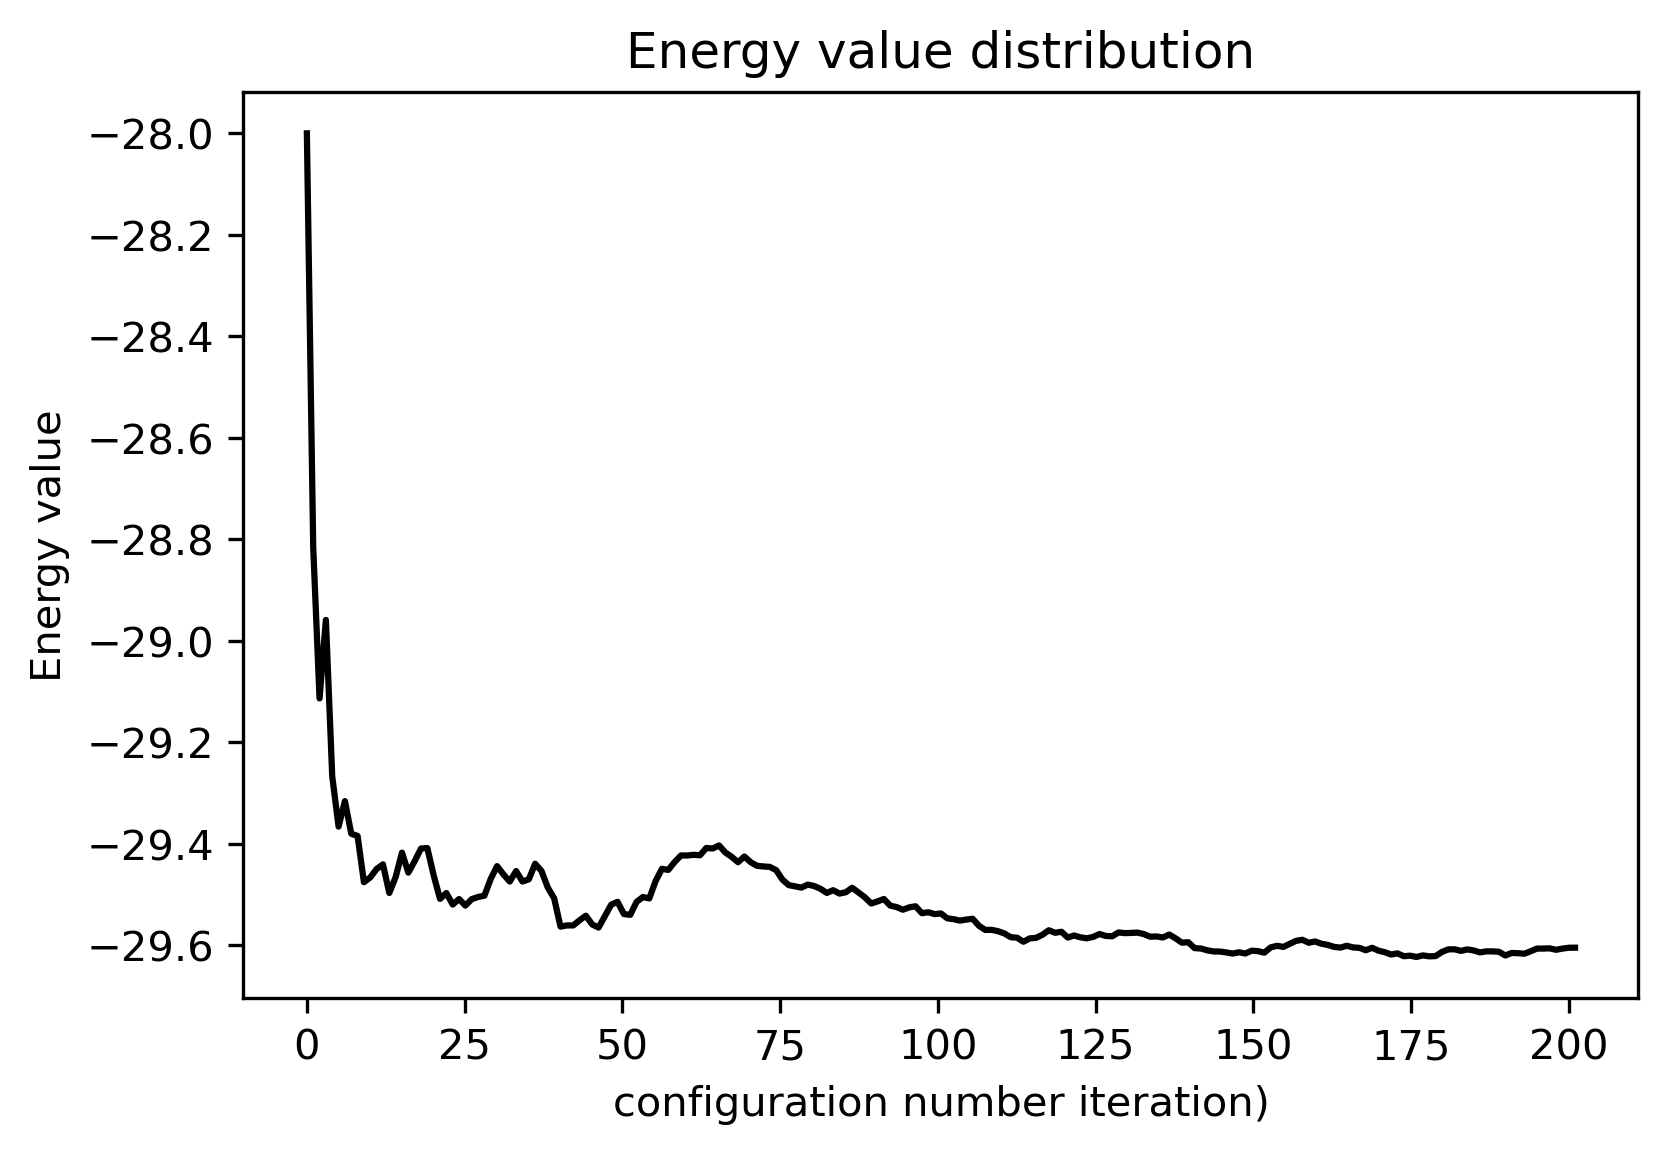

In [27]:
fig , ax= plt.subplots(dpi=300)
ics=np.linspace(0,len(list_energybariablevalue),len(list_energybariablevalue))
ax.plot(ics,list_energybariablevalue, color='black')
ax.set_xlabel('configuration number iteration)')
ax.set_ylabel('Energy value')
plt.title('Energy value distribution')
plt.show()
#print(len(ics))

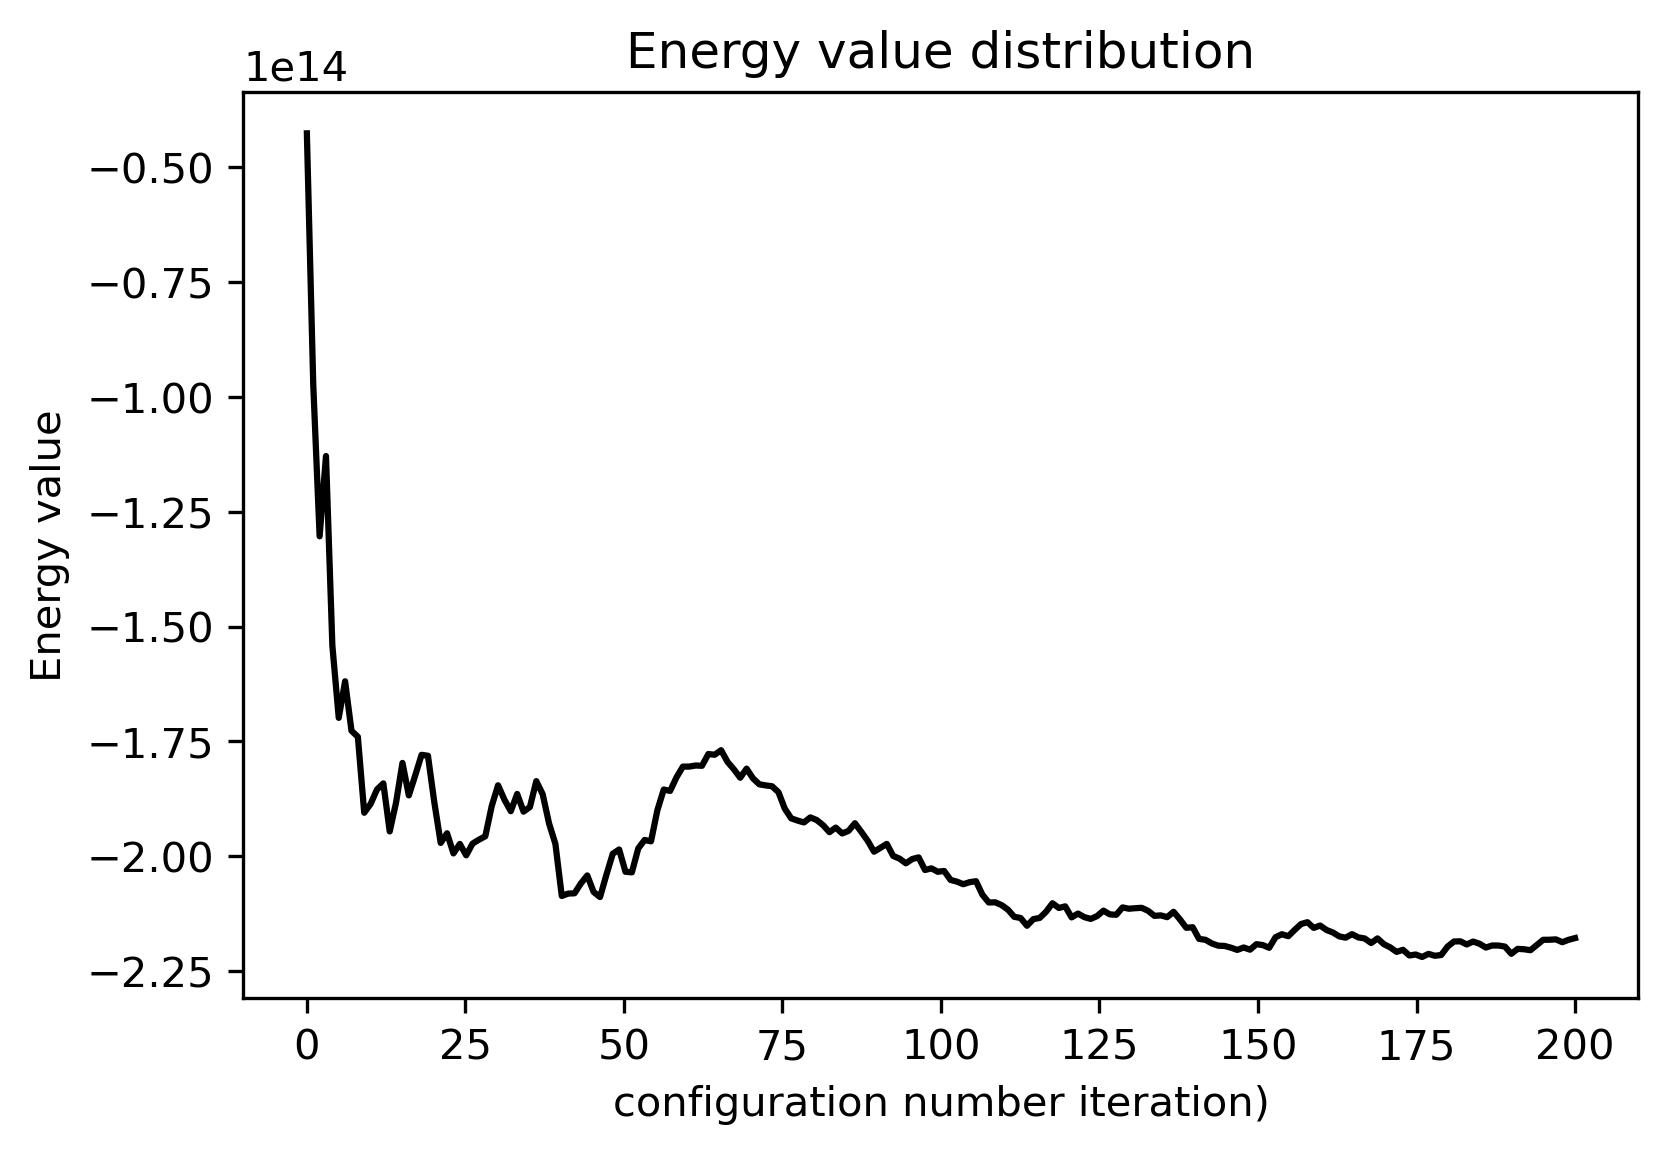

In [28]:
fig , ax= plt.subplots(dpi=300)
ics=np.linspace(0,len(list_Energytotwheighted),len(list_Energytotwheighted))
ax.plot(ics,list_Energytotwheighted, color='black')
ax.set_xlabel('configuration number iteration)')
ax.set_ylabel('Energy value')
plt.title('Energy value distribution')
plt.show()
#print(len(ics))

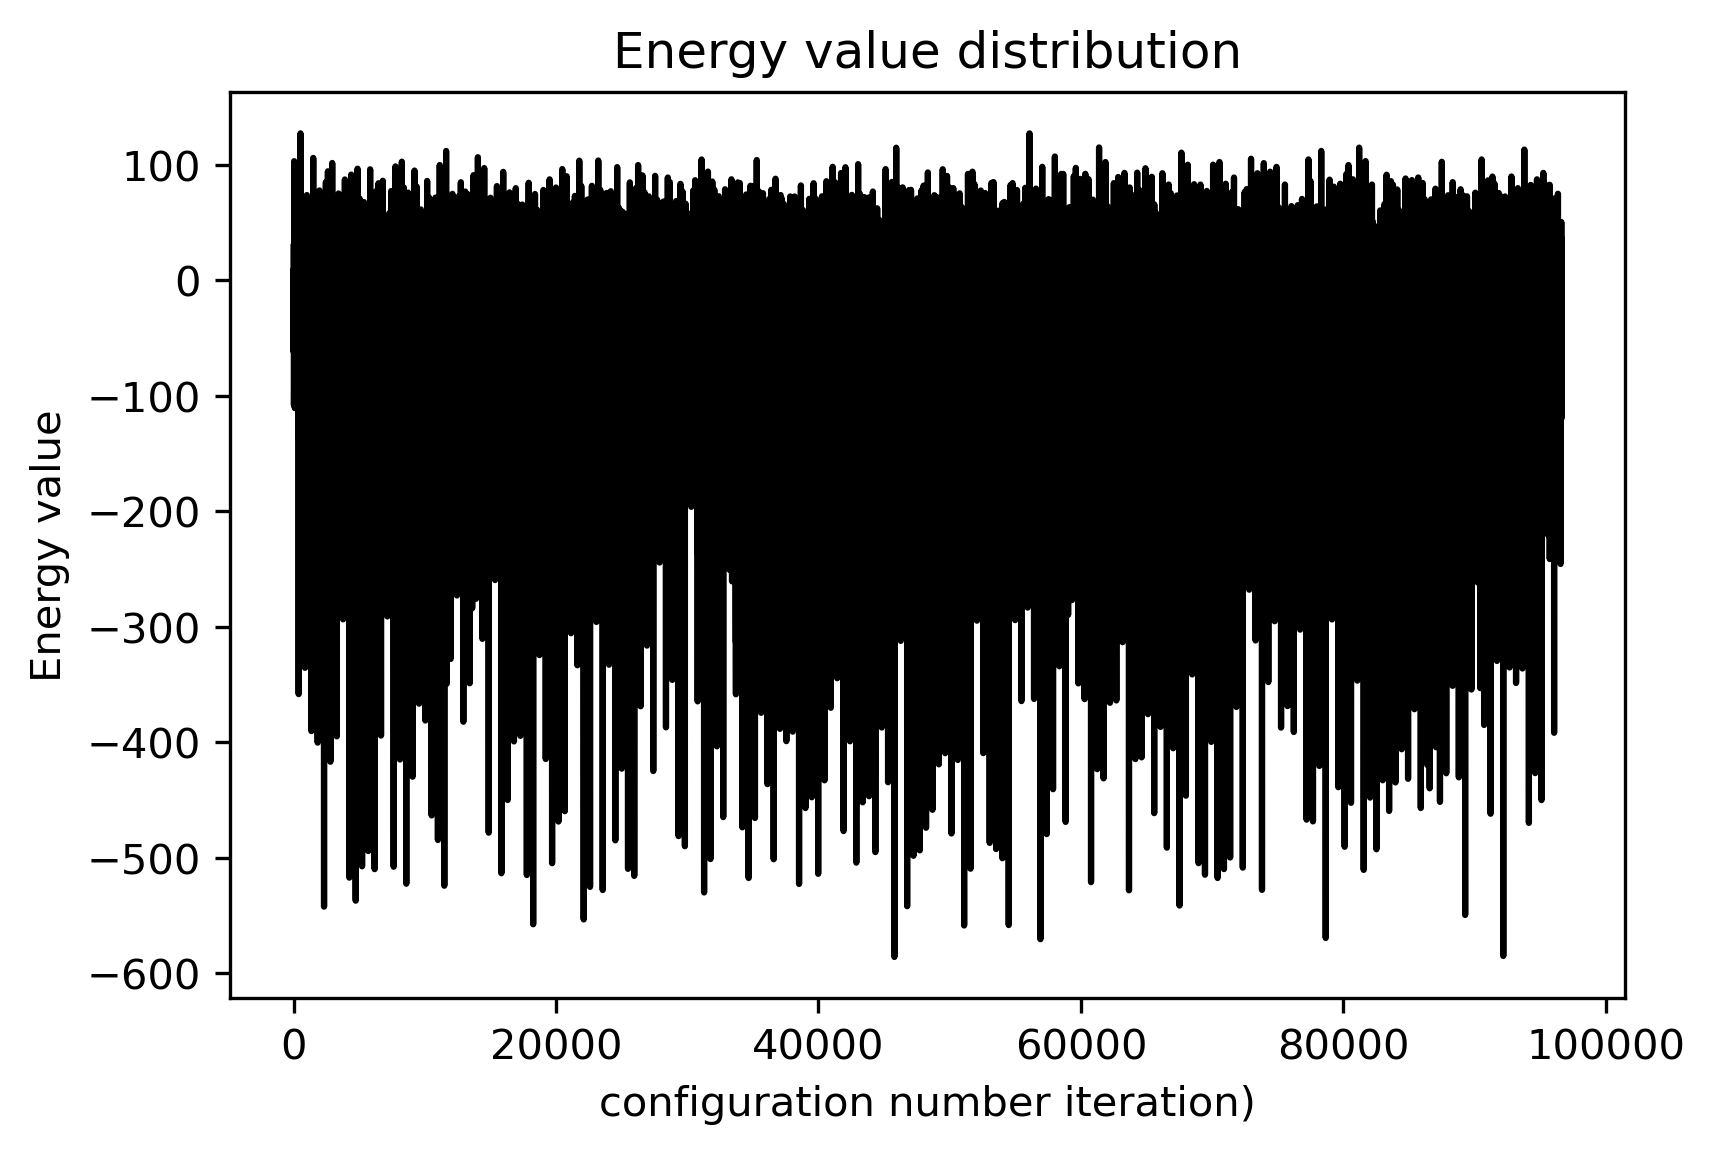

In [29]:
fig , ax= plt.subplots(dpi=300)
ics=np.linspace(0,len(list_Energytot),len(list_Energytot))
ax.plot(ics,list_Energytot, color='black')
ax.set_xlabel('configuration number iteration)')
ax.set_ylabel('Energy value')
plt.title('Energy value distribution')
plt.show()
#print(len(ics))

In [ ]:
#con 400 iteration in list_R e 100 in number of configuration mi erano venuti valori circa intorno a -28....
#con 800 e 200 mi ervano venuri valori convergenti subitissimo a -23..
#ora ho lìrilanciato con le stesse impostazioni(800 e 200) e mi è venuto molto bello, non subito convergente, 
#ma tende a -28, salvo il grafico che mi sembra molto bello

In [20]:
#QUESTA FUNZIONE CONSENTE DI MANTENERE LA PRIMA R FISSATA E NON AGGIORNARLA TUTTE LE VOLTE
def configuration():
    #QUI ORA RICHIAMO LA CREAZIONE DI R OGNI VOLTA, PERCHÈ HO VISTO CHE IL VALORE CALCOLATO DI ENERGIA
    #MEDIA DIPENDE MOLTO DALLA CONFIGURAZIONE INIZIALE, QUINDI PROVANDO A MEDIARE ANCHE SU QUELLE
    #POSSO PROVARE AD AVERE UN VALORE PIU SIMILE OGNI VOLTA
    R = (np.random.rand(3,A)-0.5)*10*step # Coordinates Matrix (number from -3 to 3)
    
    list_R = []
    list_R.append(R)
    E_ltotal=0
    E_lacc=0
    NA=0
    NIC=0
    for k in range(0,1200):
        R_new = R.copy() + step*(np.random.rand(3,A)-0.5)
        if ((WF(R_new, Bestpar)/WF(R, Bestpar))**2>1 or (WF(R_new, Bestpar)/WF(R, Bestpar))**2 > np.random.rand() ):
            R = R_new.copy()
            list_R.append(R)
            NA = NA +1
            E_lacc=E_lacc + V(R) - (K(R,Bestpar)/WF(R,Bestpar))
        #else:              # MI SA CHE VA LEVATO QUESTO ELSE
            #R = R.copy()
            #list_R.append(R)
        NIC=NIC+1
        E_ltotal=E_ltotal + V(R) - (K(R,Bestpar)/WF(R,Bestpar))
    return(list_R)

In [21]:
fii=configuration(R)
print(len(fii))
print(NA) #queeti non sono definiti, esistono solo dentro la funzione
print(NIC)

604


NameError: name 'NA' is not defined

In [48]:
print(R)

[[-1.07366788  1.05390621 -0.90667464 -2.63905246]
 [-2.02707418 -0.91574826 -1.4095012  -2.37165471]
 [-1.09513895  1.85517613 -1.59808342  1.5783484 ]]


In [70]:
#DUE

#HO COPIATO QUELLO SOPRA PER MODIFICARLO SENZA PERDERLO.
#----------------------------------------------------------|||||||--------------------------------
#QUI PENSO CHE CHIAMERò L'ALGORITMO DI CREAZIONE DELLA list_R AD OGNI CICLO*********fatto
#IN PIÙ COPIERò LE CONFIGURAZIONI PROPORZIONALMENTE AL REPLICATION INDEX
#in più terrò aggiornata la trial energy ogni ciclo

list_Energytot=[]
list_energybariablevalue=[]  #list of the energy of the cicle before that are used as a reference for computation of Pb
list_energybariablevalue.append(E0)    
list_Energytotwheighted=[]  #list of the energy wheighted in base of Pb
list_position=[]
finallist_R=[]
#numbofwalkers=len(list_R) ----->    LO METTO DENTRO AL CICLO DELLE CONFIGURATION DATO CHE CREERò DELLE CONFIGURAZIONI NUOVE AD OGNI CICLO E LA LUNGHEZZA POTREBBE VARIARE
nucleons=A
for config in range(200):
    waal=configuration(R)   #CREO UNA CONFIGURAZIONE DI 800 CIRCA MATRICI R OGNUNA CON UNO STEP IN PIU, CHIARAMENTE ACCETTANDO O MENO CON IL METROPOLIS-HASTING ALGORITM (sarebbe list_R di fatto, la la creo 100 volte, 100 configurazioni)
    numbofwalkers=len(waal)   #NUMBOFWALKERS SAREBBE IL NUMERO DI MATRCI CHE LA CONFIGURAZIONE CORRENTE POSSIEDE
    for walker in range(numbofwalkers):     #CICLO NELLE VARIE MATRCICI POSIZIONE DELLA CONFIGURAZIONE CORRENTE
            P=np.zeros((3,4))       #CREO UNA MATRICE DI ZERI 3x4
            fun=drifunction(waal[walker])  #CALCOLO LA DRIFT FUNCTION(GRADIENTE) PER LA MATRICE CORRENTE(waal[walker])
            for nucleon in range(A):       #ciclo su tutti i nucleoni nella matrice corrente(4) e applico un altro shift con la drift function e una gaussiana
                P[:,nucleon]=waal[walker][:,nucleon] + D*tau*fun[:,nucleon] + math.sqrt(2*D*tau)*gaussrand()
                
            #list_R[walker]
            #for nucl in range(nucleons):  #nucleon=4=A   questo ciclo for non serve a una sega, è gia dentro a shifting il ciclo sui nucleoni
            
            #HO COMMENTATO 'P=shifting(walker)' PERCHÈ LA FUNZIONE SHIFTING HA ALL'INTERNO LIST_R, MA DOVENDO AGGIORNARLA AD OGNI 
            #CONFIGURAZIONE L'HO MESSA DENTRO UNA FUNZIONE E NON è UNA VARIABILE LOCALE, MA ESISTE SOLO DENTRO ALLA 'configuration'
            #PERTANTO ESTRAGGO IL SUCCO DELLA FUNZIONE SHIFTING E LO AGGIORNO QUI DENTRO 
            #P=shifting(walker)  #RESTITUSCE LA MATRICE DOPO LO SHIFTING R'=R + ...
            
            rat=rattio(P)      #RESTITUISCE IL RAPPORTO TRA I MUDULI QUADRI DELLE TRIAL FUNCTIONS valutate in R' e R
            
                #Metropolis question?? VALUTO SE LO SHIFTING CALCOLATO È ACCETTABILE
            if(rat>1 or rat> np.random.rand()):
                #accetta lo spostamento
                finallist_R.append(P)   #REGISTRO LA NUOVA MATRICE SHIFTATA
                list_Energytot.append(Elocale(P,Bestpar))
                
                    #errore
                    #PENSAVO ANDASSE CALCOLATO AD OGNI SHIFTING, IN RELTà INVECE SOLO NELLE SINGOLE CONFIGURAZIONI, QUINDI VA FUORI DA QUESTO CICLO
    #                n=replication_factor(P)  #CALCOLO IL REPLICATION FACTOR E SOTTO SOMMO LE ENERGIE IN BASE A 'n'
    #                for i in range(n):
    #                    list_Energytot.append(Elocale(shifting(walker),Bestpar))

    #for walker in range(numbofwalkers):  no!!
    
    Pb=math.exp(-(tau)*((1/2)*((sum(list_Energytot)/len(list_Energytot))+Elocale(R,Bestpar)))-list_energybariablevalue[config])    # QUANDO GIRI SU UNA SOLA CONFIG RICORDATI DI CAMBIERE 'configuration' con '0'.
    #Perchè il primo termine di list_energybariablevalue è E0, quindi se l'indice di ista è aggiornato a quello locale è come se stesse girando al valore precedente dato che lo zeresimo elemento è E0
    list_Energytotwheighted.append((sum(list_Energytot)/len(list_Energytot))*Pb)  #APPENDE L'ENERGI ALOCALE DELLA CONFIGURAZIONE PESATA SU Pb

    floor=math.floor(Pb + np.random.rand())  #approssima all'intero più vicino

    #for i in range(floor):
        #-----MAKE 'FLOOR' COPIES OF THE CONFIGURATION. 
        #WHAT IS A COPIE OF THE CONFIGURATION EXACLTLY?? 
    

    list_energybariablevalue.append((sum(list_Energytot)/len(list_Energytot)))
    
#final=sum(list_Energytot)/(100*numbofwalkers)
#PRIMA DI FARE ALCUNI CAMBIAMENTI MI CI AVEVA MESSO UNA VITA

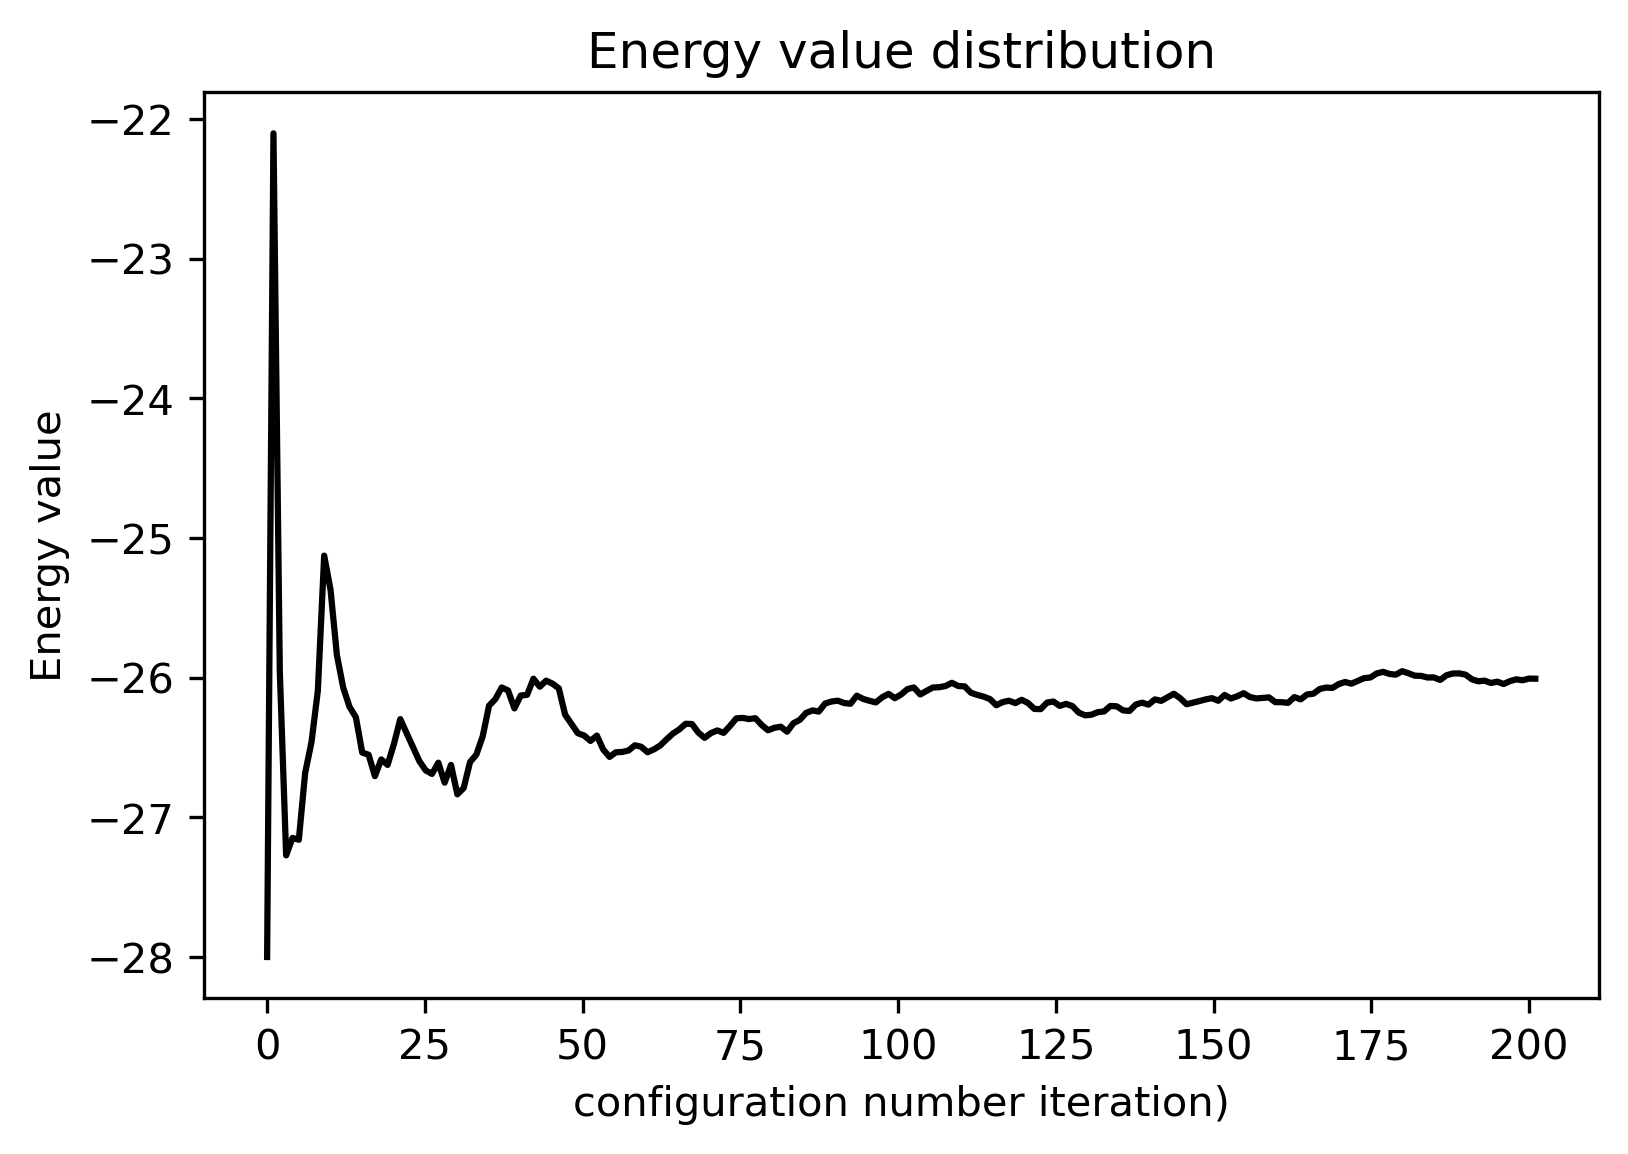

In [71]:
fig , ax= plt.subplots(dpi=300)
ics=np.linspace(0,len(list_energybariablevalue),len(list_energybariablevalue))
ax.plot(ics,list_energybariablevalue, color='black')
ax.set_xlabel('configuration number iteration)')
ax.set_ylabel('Energy value')
plt.title('Energy value distribution')
plt.show()
#print(len(ics))

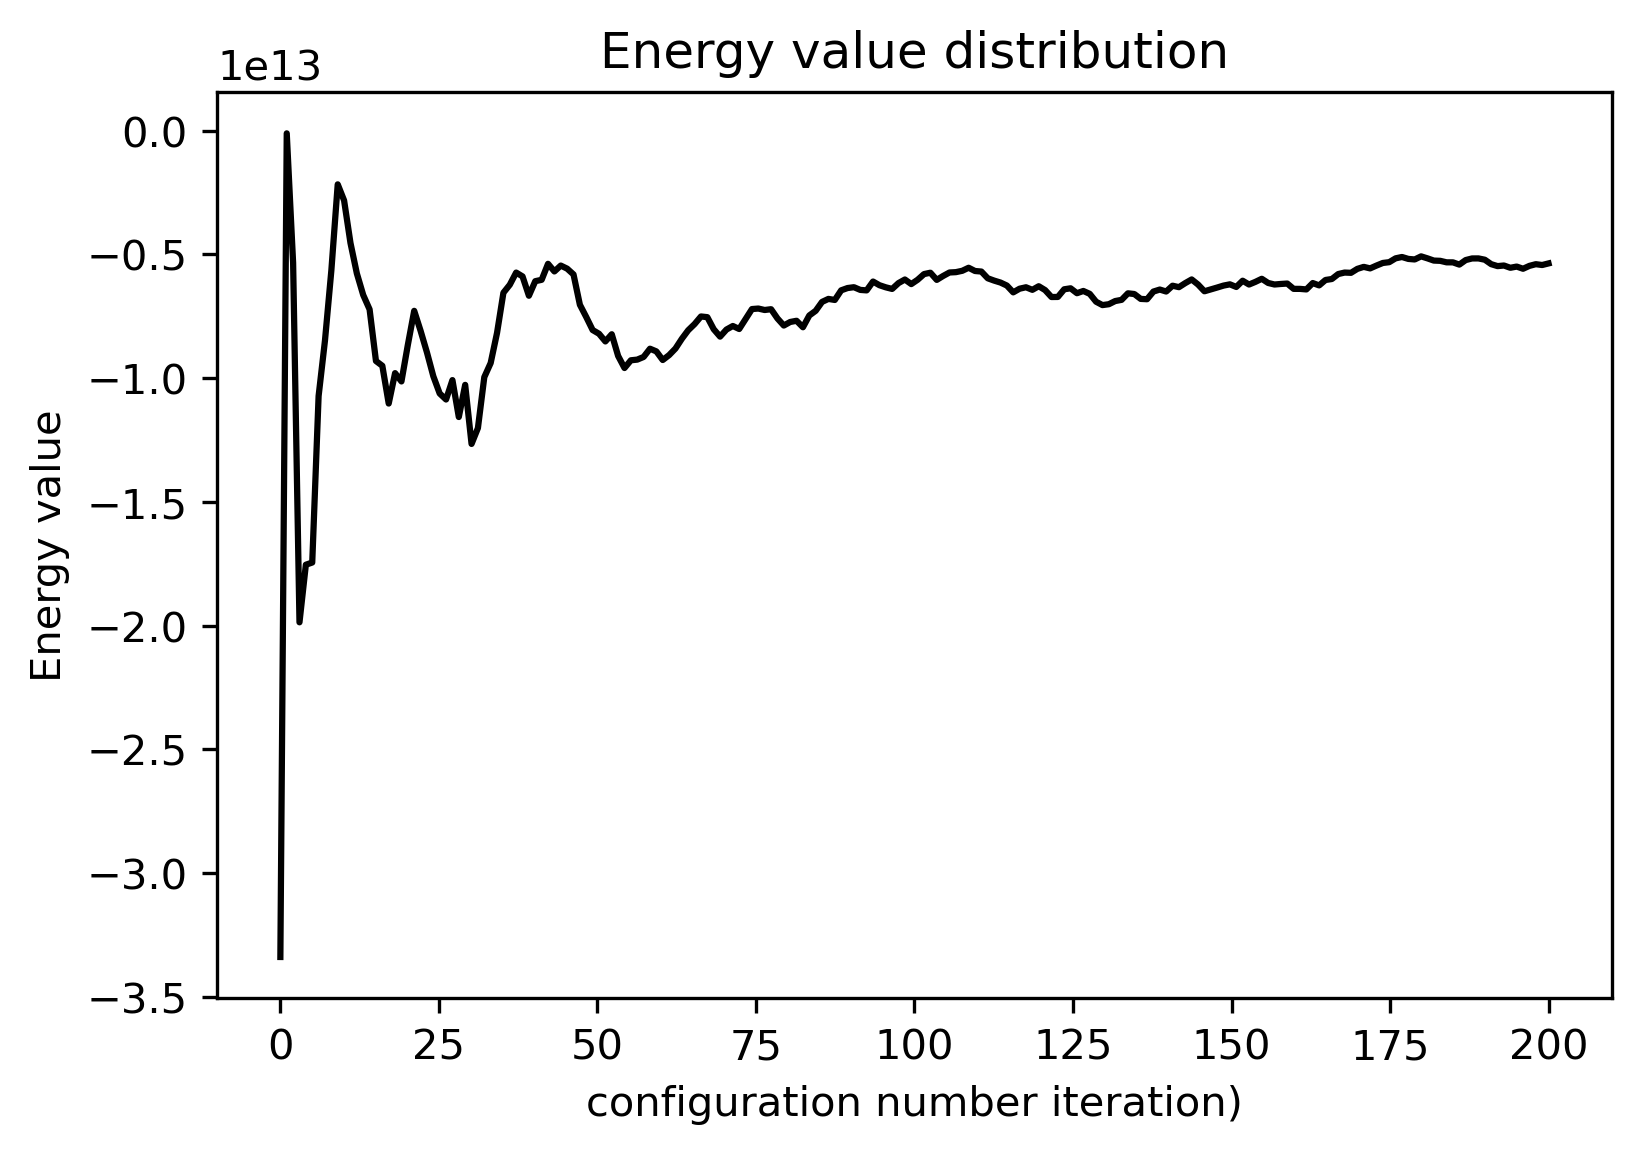

In [72]:
fig , ax= plt.subplots(dpi=300)
ics=np.linspace(0,len(list_Energytotwheighted),len(list_Energytotwheighted))
ax.plot(ics,list_Energytotwheighted, color='black')
ax.set_xlabel('configuration number iteration)')
ax.set_ylabel('Energy value')
plt.title('Energy value distribution')
plt.show()
#print(len(ics))

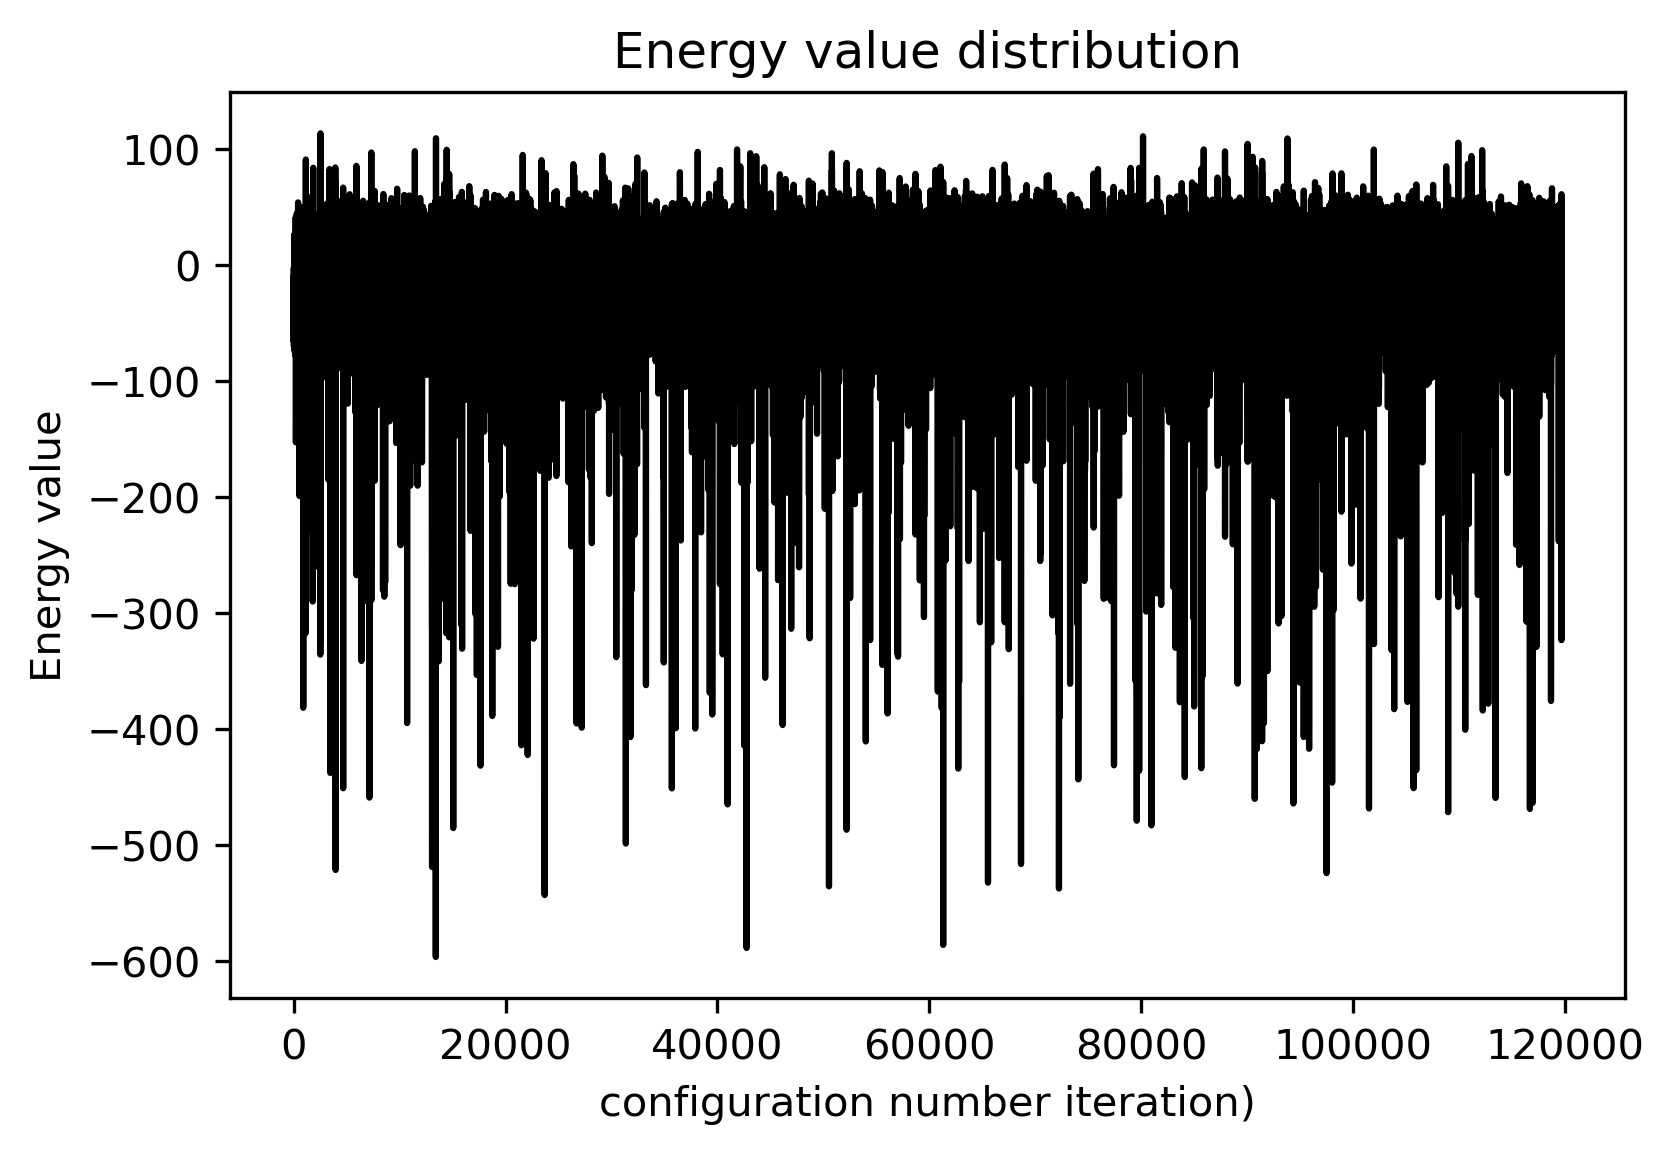

In [73]:
fig , ax= plt.subplots(dpi=300)
ics=np.linspace(0,len(list_Energytot),len(list_Energytot))
ax.plot(ics,list_Energytot, color='black')
ax.set_xlabel('configuration number iteration)')
ax.set_ylabel('Energy value')
plt.title('Energy value distribution')
plt.show()
#print(len(ics))

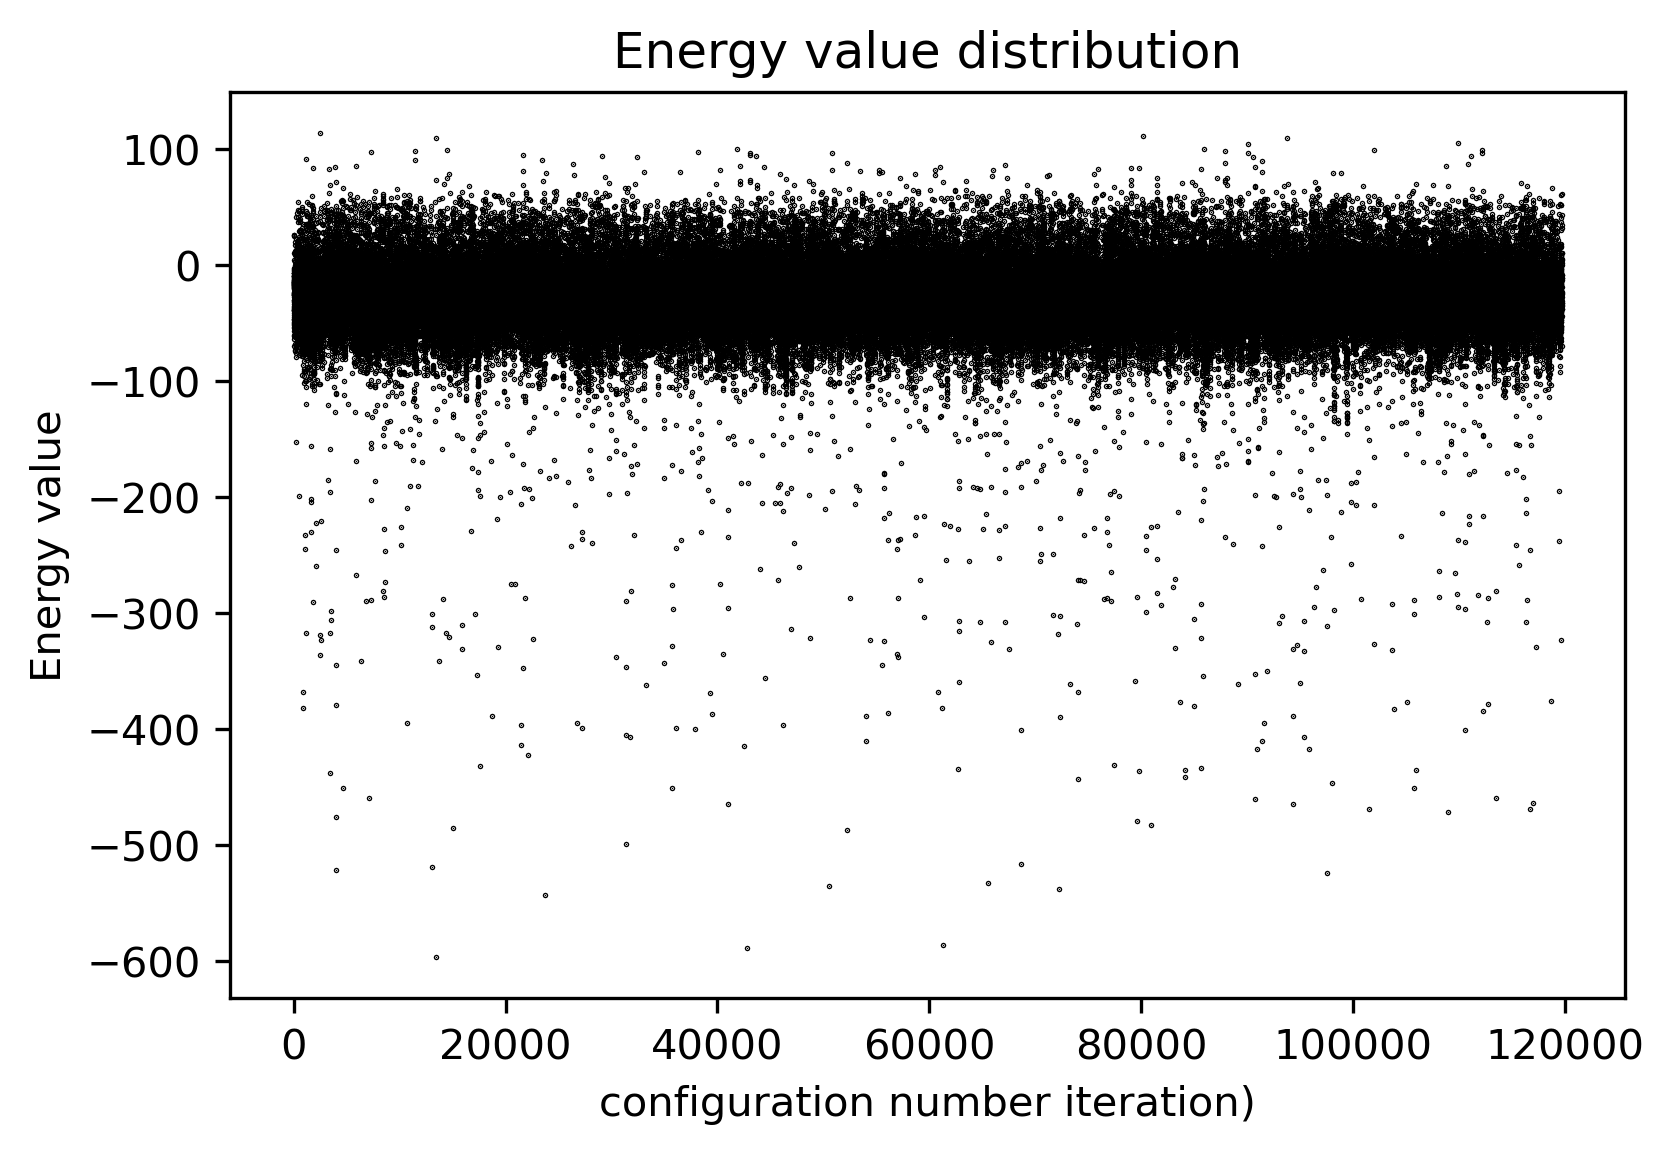

In [74]:
fig , ax= plt.subplots(dpi=300)
ics=np.linspace(0,len(list_Energytot),len(list_Energytot))
ax.scatter(ics,list_Energytot, s=0.1, color='black')
ax.set_xlabel('configuration number iteration)')
ax.set_ylabel('Energy value')
plt.title('Energy value distribution')
plt.show()
#print(len(ics))

In [29]:
#TRE

#HO COPIATO QUELLO SOPRA PER MODIFICARLO SENZA PERDERLO.
#--------------------
#QUI PENSO CHE CHIAMERò L'ALGORITMO DI CREAZIONE DELLA list_R AD OGNI CICLO*********fatto
#IN PIÙ COPIERò LE CONFIGURAZIONI PROPORZIONALMENTE AL REPLICATION INDEX
#in più terrò aggiornata la trial energy ogni ciclo
#***************************************************************************************
#LHO RICOPIATO ANCORA
#--------------------
#PRIMA list_energytot non veniva rinizializzata ad ogni configurazione, ma veniva solamente allungata. CAMBIERØ QUESTO
#LA CHIAMERò 'list_Energyconfiguration'

#REGISTRA LE ENERGIE AL QUADRATO!!!!

#ORA QUESTO CODICE RICHIAMA AD OGNI CONFIGURAZIONE UNA DISTRIBUZIONE INIZIALE NUOVA, NON VI È PIÙ UNA FISSA


list_Energytot=[]
list_sigma=[]
list_energysquaredtot=[]
list_energybariablevalue=[]  #list of the energy of the cicle before that are used as a reference for computation of Pb
list_energybariablevalue.append(E0)    
list_Energytotwheighted=[]  #list of the energy wheighted in base of Pb
list_position=[]
finallist_R=[]
#numbofwalkers=len(list_R) ----->    LO METTO DENTRO AL CICLO DELLE CONFIGURATION DATO CHE CREERò DELLE CONFIGURAZIONI NUOVE AD OGNI CICLO E LA LUNGHEZZA POTREBBE VARIARE
nucleons=A
for config in range(100):
    list_Energyconfiguration=[] #VIENE RIEMPITA AD OGNI CICLO DI CONFIGURAZIONI DAL CILO FOR SOTTOSTANTE, PASSERà POI AD UNA LISTA IL VALORE DELL'ENERGIA MEDIA PER OGNI CONFIGURAZIONE.
    list_SquaredEnergyconfiguration=[]
    waal=configuration()  #-----QUI C'ERA UNA R DENTRO PARENTESI    #CREO UNA CONFIGURAZIONE DI 800 CIRCA MATRICI R OGNUNA CON UNO STEP IN PIU, CHIARAMENTE ACCETTANDO O MENO CON IL METROPOLIS-HASTING ALGORITM (sarebbe list_R di fatto, la la creo 100 volte, 100 configurazioni)
    numbofwalkers=len(waal)   #NUMBOFWALKERS SAREBBE IL NUMERO DI MATRCI CHE LA CONFIGURAZIONE CORRENTE POSSIEDE
    for walker in range(numbofwalkers):     #CICLO NELLE VARIE MATRCICI POSIZIONE DELLA CONFIGURAZIONE CORRENTE
            P=np.zeros((3,4))       #CREO UNA MATRICE DI ZERI 3x4
            fun=drifunction(waal[walker])  #CALCOLO LA DRIFT FUNCTION(GRADIENTE) PER LA MATRICE CORRENTE(waal[walker])
            for nucleon in range(A):       #ciclo su tutti i nucleoni nella matrice corrente(4) e applico un altro shift con la drift function e una gaussiana
                P[:,nucleon]=waal[walker][:,nucleon] + D*tau*fun[:,nucleon] + math.sqrt(2*D*tau)*gaussrand()
                
            #list_R[walker]
            #for nucl in range(nucleons):  #nucleon=4=A   questo ciclo for non serve a una sega, è gia dentro a shifting il ciclo sui nucleoni
            
            #HO COMMENTATO 'P=shifting(walker)' PERCHÈ LA FUNZIONE SHIFTING HA ALL'INTERNO LIST_R, MA DOVENDO AGGIORNARLA AD OGNI 
            #CONFIGURAZIONE L'HO MESSA DENTRO UNA FUNZIONE E NON è UNA VARIABILE LOCALE, MA ESISTE SOLO DENTRO ALLA 'configuration'
            #PERTANTO ESTRAGGO IL SUCCO DELLA FUNZIONE SHIFTING E LO AGGIORNO QUI DENTRO 
            #P=shifting(walker)  #RESTITUSCE LA MATRICE DOPO LO SHIFTING R'=R + ...
            
            rat=rattio(P)      #RESTITUISCE IL RAPPORTO TRA I MUDULI QUADRI DELLE TRIAL FUNCTIONS valutate in R' e R
            
                #Metropolis question?? VALUTO SE LO SHIFTING CALCOLATO È ACCETTABILE
            if(rat>1 or rat> np.random.rand()):
                #accetta lo spostamento
                finallist_R.append(P)   #REGISTRO LA NUOVA MATRICE SHIFTATA
                energy = Elocale(P,Bestpar)
                list_Energytot.append(energy)   #registra TUTTE le enrgie di ogni passo
                list_Energyconfiguration.append(energy) #registra le energie di ogni passo, ma si rinizializza ad ogni configurazione, infatti contine solo le enrgie locali delle matrici della configurazione corrente, servirà a passare i valori medi delle enrgie delle configurazioni ad ogni ciclo
                list_SquaredEnergyconfiguration.append(energy**2)
                
                    #errore
                    #PENSAVO ANDASSE CALCOLATO AD OGNI SHIFTING, IN RELTà INVECE SOLO NELLE SINGOLE CONFIGURAZIONI, QUINDI VA FUORI DA QUESTO CICLO
    #                n=replication_factor(P)  #CALCOLO IL REPLICATION FACTOR E SOTTO SOMMO LE ENERGIE IN BASE A 'n'
    #                for i in range(n):
    #                    list_Energytot.append(Elocale(shifting(walker),Bestpar))

    #for walker in range(numbofwalkers):  no!!
    
    #HO COMMENTATO QUELLA SOTTO PERCHÈ VOGLIO PROVARE QUESTA QUI SENZA L'ENERGIA LOCALE DI R INIZIALE, E HO ANCHE NOTATO CHE Pb ERA STATO SCRITTO MALE, VABEH, POCO CONTO
    Pb=math.exp(-(tau)*(((sum(list_Energyconfiguration)/len(list_Energyconfiguration)))-list_energybariablevalue[config]))  #era sbagliata la formula fino a bello43 perche tau deve moltiplicare tuttooooo!
    #Pb=math.exp(-(tau)*((1/2)*((sum(list_Energyconfiguration)/len(list_Energyconfiguration))+Elocale(R,Bestpar)))-list_energybariablevalue[config])    # QUANDO GIRI SU UNA SOLA CONFIG RICORDATI DI CAMBIERE 'configuration' con '0'.
    #Perchè il primo termine di list_energybariablevalue è E0, quindi se l'indice di ista è aggiornato a quello locale è come se stesse girando al valore precedente dato che lo zeresimo elemento è E0
    list_Energytotwheighted.append((sum(list_Energyconfiguration)/len(list_Energyconfiguration))*Pb)  #APPENDE L'ENERGI ALOCALE DELLA CONFIGURAZIONE PESATA SU Pb

    floor=math.floor(Pb + np.random.rand())  #approssima all'intero più vicino

    #for i in range(floor):
        #-----MAKE 'FLOOR' COPIES OF THE CONFIGURATION. 
        #WHAT IS A COPIE OF THE CONFIGURATION EXACLTLY?? 
    
    meanenergy= sum(list_Energyconfiguration)/len(list_Energyconfiguration)
    list_energybariablevalue.append(meanenergy)
    
    meansquaredenergyconfiguration=sum(list_SquaredEnergyconfiguration)/len(list_SquaredEnergyconfiguration)
    list_energysquaredtot.append(meansquaredenergyconfiguration)
    
    simga = math.sqrt( ( (meansquaredenergyconfiguration) - ( (meanenergy)**2) )/len(list_Energyconfiguration))
    list_sigma.append(sigma)
    
    print("configuration number ", config , "\n  The mean energy value is: ", meanenergy, " +- ", sigma)
    
#final=sum(list_Energytot)/(100*numbofwalkers)
#PRIMA DI FARE ALCUNI CAMBIAMENTI MI CI AVEVA MESSO UNA VITA

configuration number  0 
  The mean energy value is:  -21.52859980982997  +-  0.20357430357794795
configuration number  1 
  The mean energy value is:  -22.074983079696832  +-  0.20357430357794795
configuration number  2 
  The mean energy value is:  -24.889986251651504  +-  0.20357430357794795
configuration number  3 
  The mean energy value is:  -27.435705925140038  +-  0.20357430357794795
configuration number  4 
  The mean energy value is:  -30.661502669087593  +-  0.20357430357794795
configuration number  5 
  The mean energy value is:  -29.02553263838892  +-  0.20357430357794795
configuration number  6 
  The mean energy value is:  -25.37768146004619  +-  0.20357430357794795
configuration number  7 
  The mean energy value is:  -28.167169683597862  +-  0.20357430357794795
configuration number  8 
  The mean energy value is:  -27.12418778922522  +-  0.20357430357794795
configuration number  9 
  The mean energy value is:  -30.958343767126372  +-  0.20357430357794795
configuration 

configuration number  83 
  The mean energy value is:  -29.199553521375847  +-  0.20357430357794795
configuration number  84 
  The mean energy value is:  -25.200917583260953  +-  0.20357430357794795
configuration number  85 
  The mean energy value is:  -28.417569355093775  +-  0.20357430357794795
configuration number  86 
  The mean energy value is:  -27.28408146472637  +-  0.20357430357794795
configuration number  87 
  The mean energy value is:  -27.758630433029726  +-  0.20357430357794795
configuration number  88 
  The mean energy value is:  -26.22702545968729  +-  0.20357430357794795
configuration number  89 
  The mean energy value is:  -25.286292301417593  +-  0.20357430357794795
configuration number  90 
  The mean energy value is:  -28.761270759159267  +-  0.20357430357794795
configuration number  91 
  The mean energy value is:  -23.452571761694976  +-  0.20357430357794795
configuration number  92 
  The mean energy value is:  -28.77294656841066  +-  0.20357430357794795
con

In [71]:
print(list_sigma)
print(list_energysquaredtot)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1340.4733590652756, 1389.4983798594767, 2149.2107692466134, 1684.9478129667423, 1625.66965109637, 1602.733152428103, 1602.0830198927727, 1288.430089299522, 1698.4651980240994, 2441.909197165387, 2231.510822772117, 1421.0933264200667, 1722.3853873897936, 1341.5755883076022, 1537.5662693516606, 1902.5757492862042, 1254.5452261855055, 1422.646566276279, 1179.139525757854, 1386.4152485795314, 2077.9355812346084, 1230.926286727144, 1426.8540819953273, 2056.2371258507874, 1187.6924425520444, 2068.6287428474375, 1773.1522022509816, 1431.7319871083616, 1582.6729921011065, 1999.7315628551255, 2542.8104064255117, 1577.7289641482566, 1108.32884088965, 1849.3844529542175, 1422.1281851671795, 915.75764

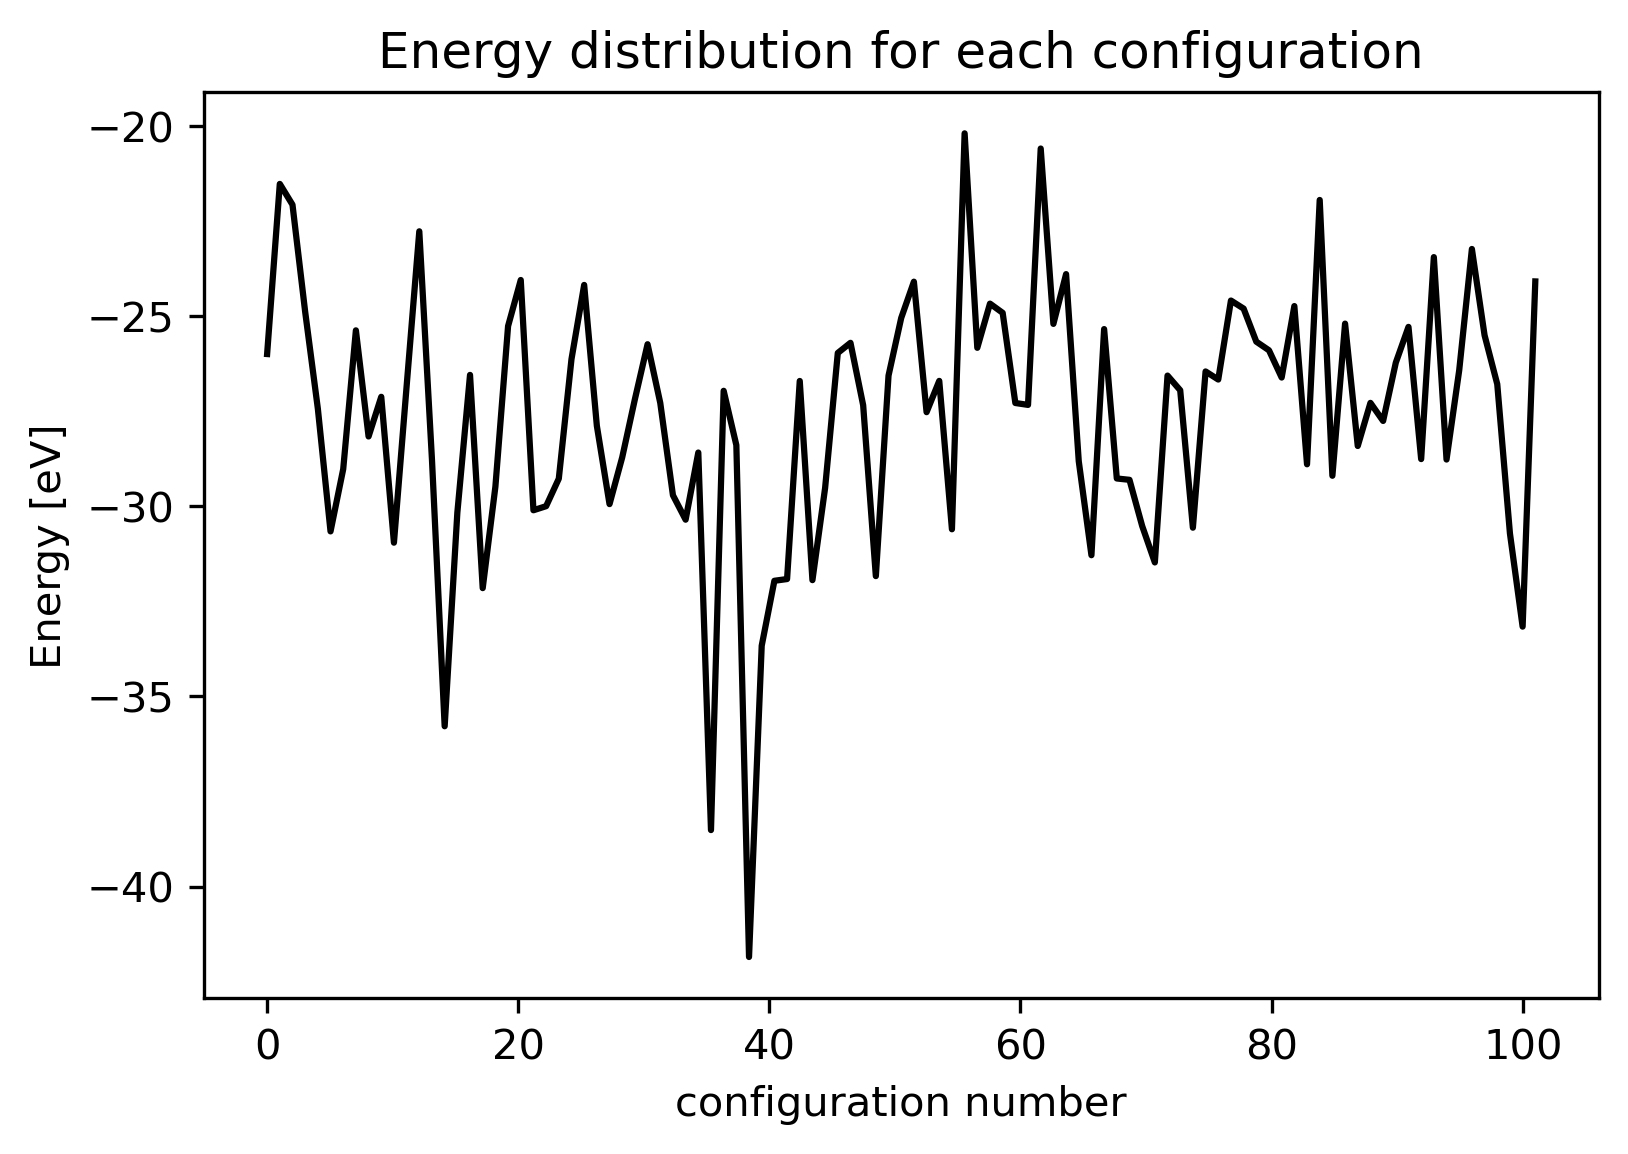

In [30]:
fig , ax= plt.subplots(dpi=300)
ics=np.linspace(0,len(list_energybariablevalue),len(list_energybariablevalue))
ax.plot(ics,list_energybariablevalue, color='black')
ax.set_xlabel('configuration number')
ax.set_ylabel('Energy [eV]')
plt.title('Energy distribution for each configuration')
plt.show()
#print(len(ics))

In [31]:
print(sum(list_energybariablevalue)/len(list_energybariablevalue))
print(len(list_energybariablevalue))

#tutto con configuration=500 e la lista creata per ogni configurazione lunga 800,
#ma comunque con una selezione interna data dal metropolis-hasting question, quindi sono circa 600.

#con E0=-28 la media delle energie caloclare faceva:-25.272343045633058
#con E0=-25 la media delle energie calcolate faceva: -30.25544102949634  bello15
#con E0=-25 la media delle energie calcolate faceva: -30.311834856850584 bello19
#con E0=-28 la media delle energie caloclare faceva: -30.293387960335565 bello23
#con E0=-28 la media delle energie caloclare faceva: -29.689587507995018 bello24
#con E0=-28 la media delle energie caloclare faceva: -23.89977462821116 bello28


#con 100 configuration
#con E0=-28 la media delle energie caloclare faceva:-24.063567641908545 bello30

#cambiando R iniziale
##con E0=-28 la media delle energie caloclare faceva:-32.09945490538332 bello32
##con E0=-28 la media delle energie caloclare faceva: -32.578856752521766 bello33

#cambiando R iniziale
#con E0=-28 la media delle energie caloclare faceva: -32.3936018760646 bello34

#Cambiando R iniziale
#con E0=-28 la media delle energie caloclare faceva: -32.78948955328789 bello 35

#camnbiando R iniziale
#con E0=-28 la media delle energie caloclare faceva:-25.692054555808035 bello36
#con E0=-28 la media delle energie caloclare faceva:-26.291382430204457 bello37

#------------------------------------------
#ORA HO CAMBIATO LA FUNZIONE CONFIGURATION, HO INSERITO UN RINIZIALIZZATORE DI R INIZIALE
#OGNI VOLTA CHE VIENE CHIAMATA, PERCHÈ HO VISTO TROPPA DIPENDENZA DELL'ENERGIA MEDIA DALLO STATO INIZIALE 

#con E0=-28 la media delle energie caloclare faceva: -26.43119373720527 bello38
#con E0=-28 la media delle energie caloclare faceva: -26.12699651173654 bello40

#cambiato la lunghezza degli walker da 800 a 1200
#con E0=-28 la media delle energie caloclare faceva: -25.855653335970953 bello41
#con E0=-28 la media delle energie caloclare faceva: -25.84629111112277 bello 42
#con E0=-28 la media delle energie caloclare faceva: -26.95480750982787 bello 43


#cambio E0=-26 MeV
#con E0=-26 la media delle energie caloclare faceva: -26.839351046063438 bello44
#CAMBIATO Pb
#con E0=-26 la media delle energie caloclare faceva: -27.621327869824093 bello45

-27.621327869824093
101


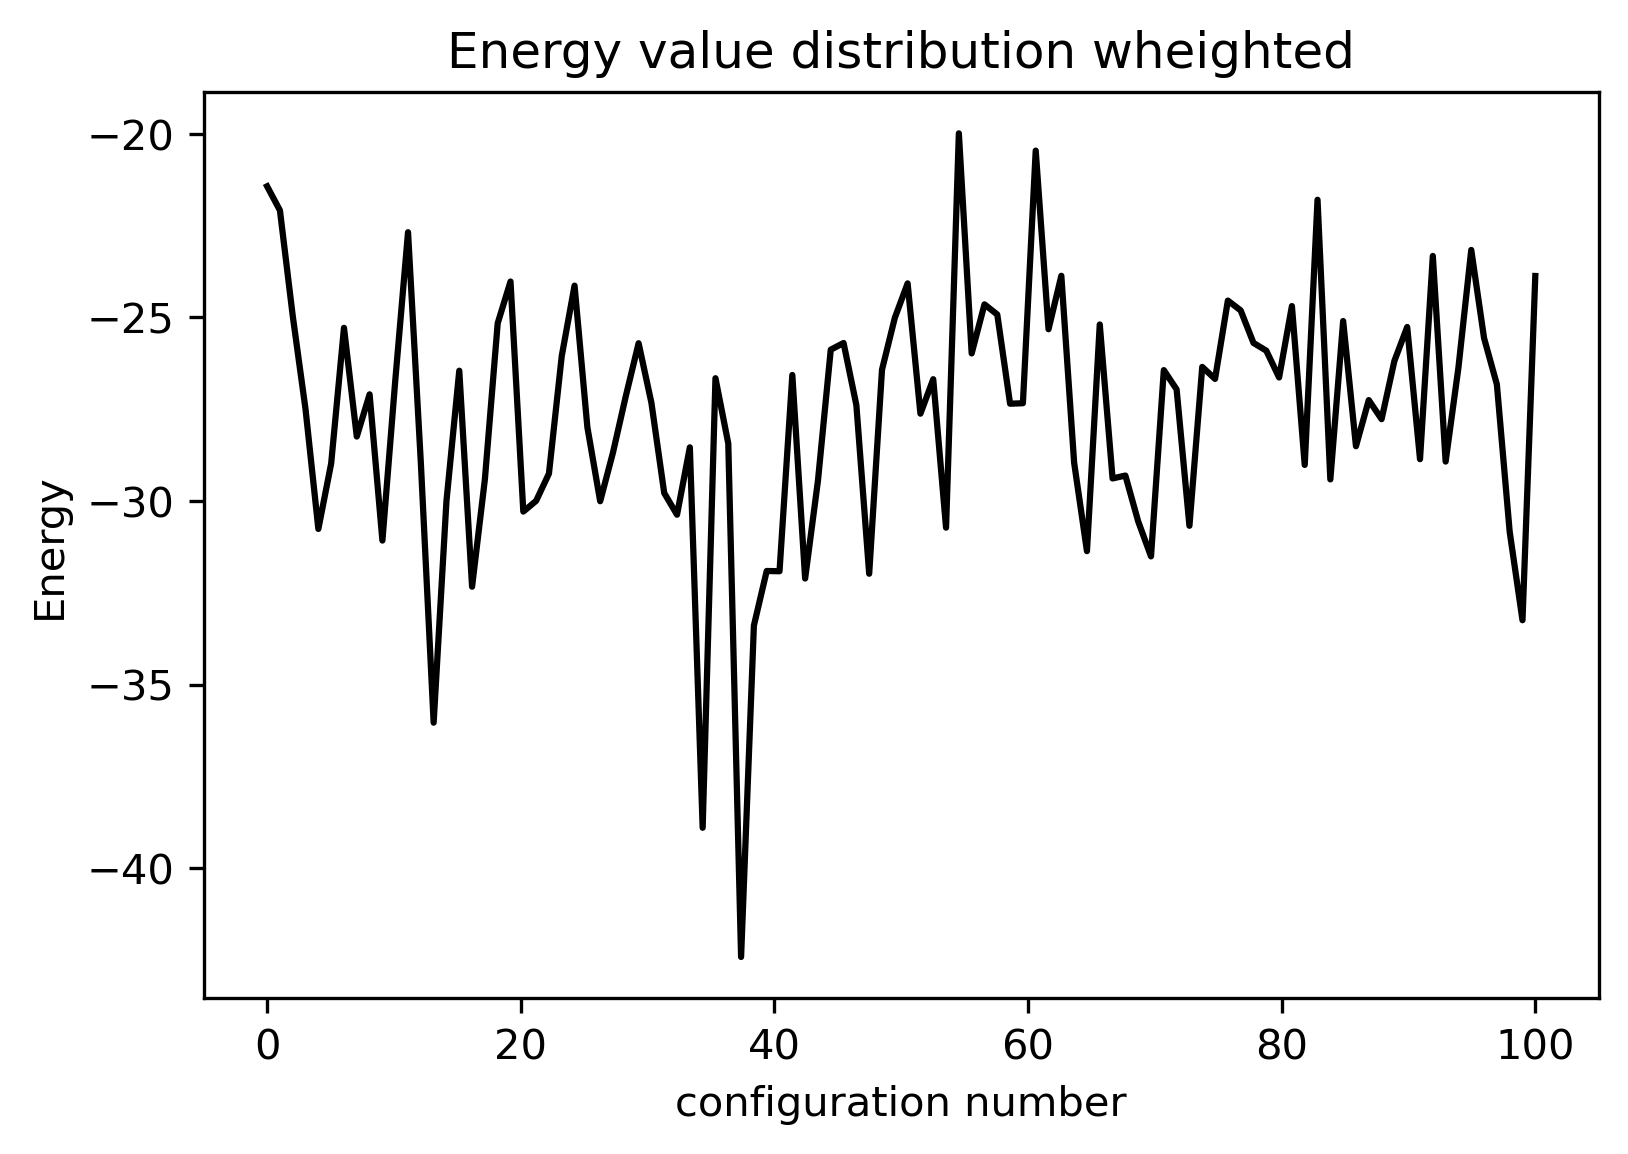

In [32]:
fig , ax= plt.subplots(dpi=300)
ics=np.linspace(0,len(list_Energytotwheighted),len(list_Energytotwheighted))
ax.plot(ics,list_Energytotwheighted, color='black')
ax.set_xlabel('configuration number')
ax.set_ylabel('Energy')
plt.title('Energy value distribution wheighted')
plt.show()
#print(len(ics))

In [33]:
#WOOOOOOOO
#ORA FUNZIONA QUESTO WHEIGHTED!!!
print(sum(list_Energytotwheighted)/len(list_Energytotwheighted))

#wheighted uno: -27.646005832076604 bello46

-27.646005832076604


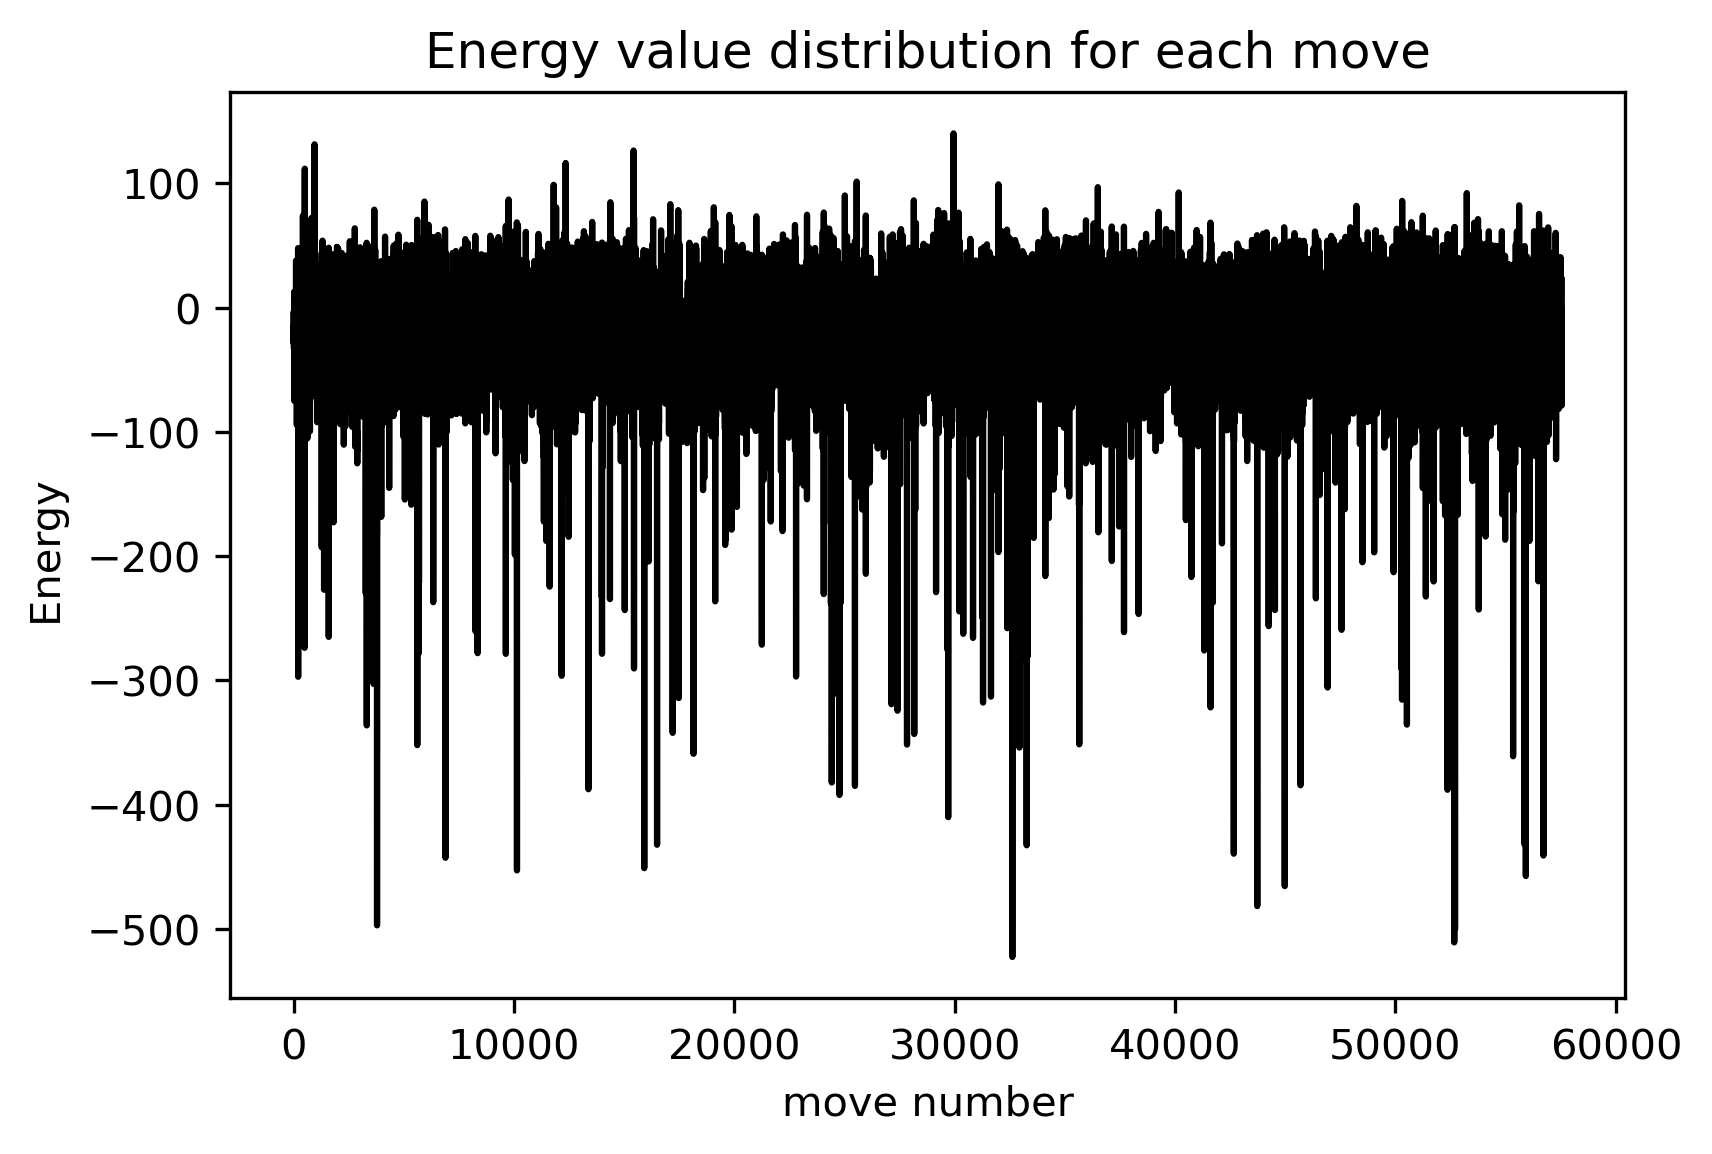

In [90]:
fig , ax= plt.subplots(dpi=300)
ics=np.linspace(0,len(list_Energytot),len(list_Energytot))
ax.plot(ics,list_Energytot, color='black')
ax.set_xlabel('move number')
ax.set_ylabel('Energy ')
plt.title('Energy value distribution for each move')
plt.show()
#print(len(ics))

In [81]:
print(sum(list_Energytot)/len(list_Energytot))

-26.40448241204186


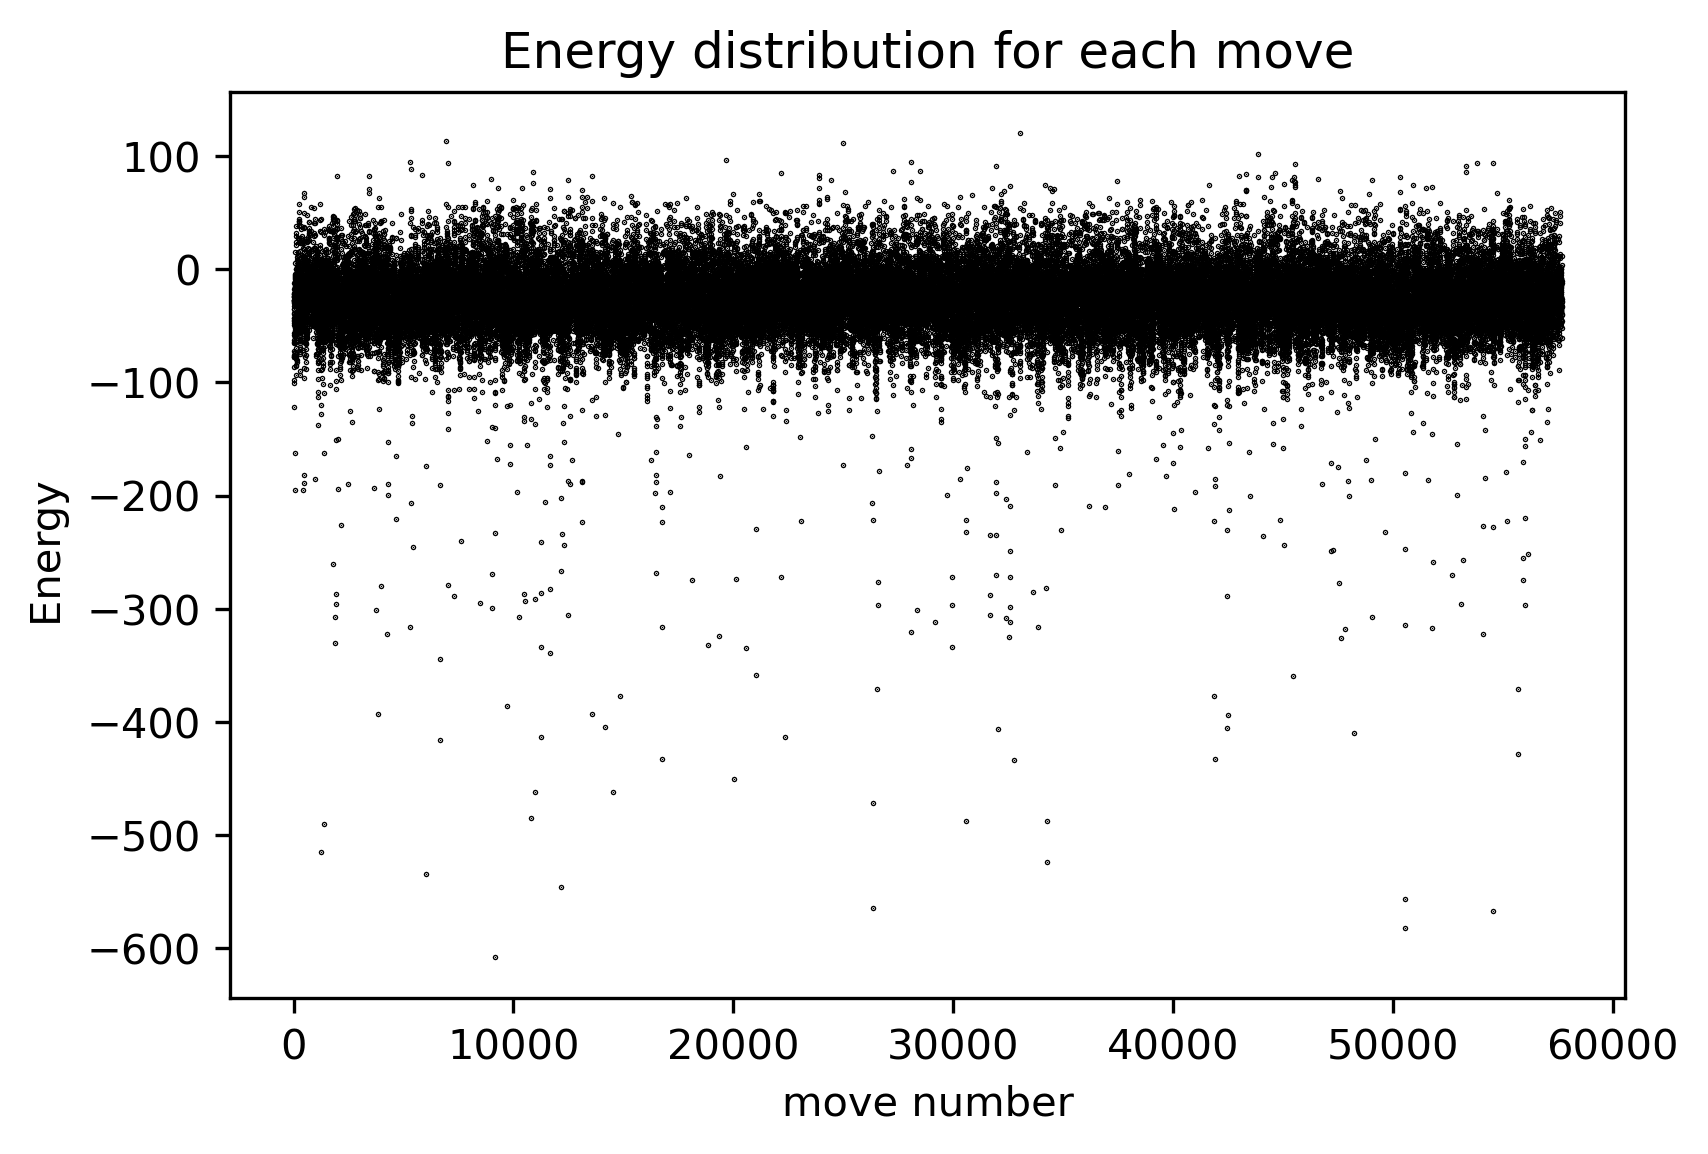

In [82]:
fig , ax= plt.subplots(dpi=300)
ics=np.linspace(0,len(list_Energytot),len(list_Energytot))
ax.scatter(ics,list_Energytot, s=0.1, color='black')
ax.set_xlabel('move number')
ax.set_ylabel('Energy ')
plt.title('Energy distribution for each move')
plt.show()
#print(len(ics))

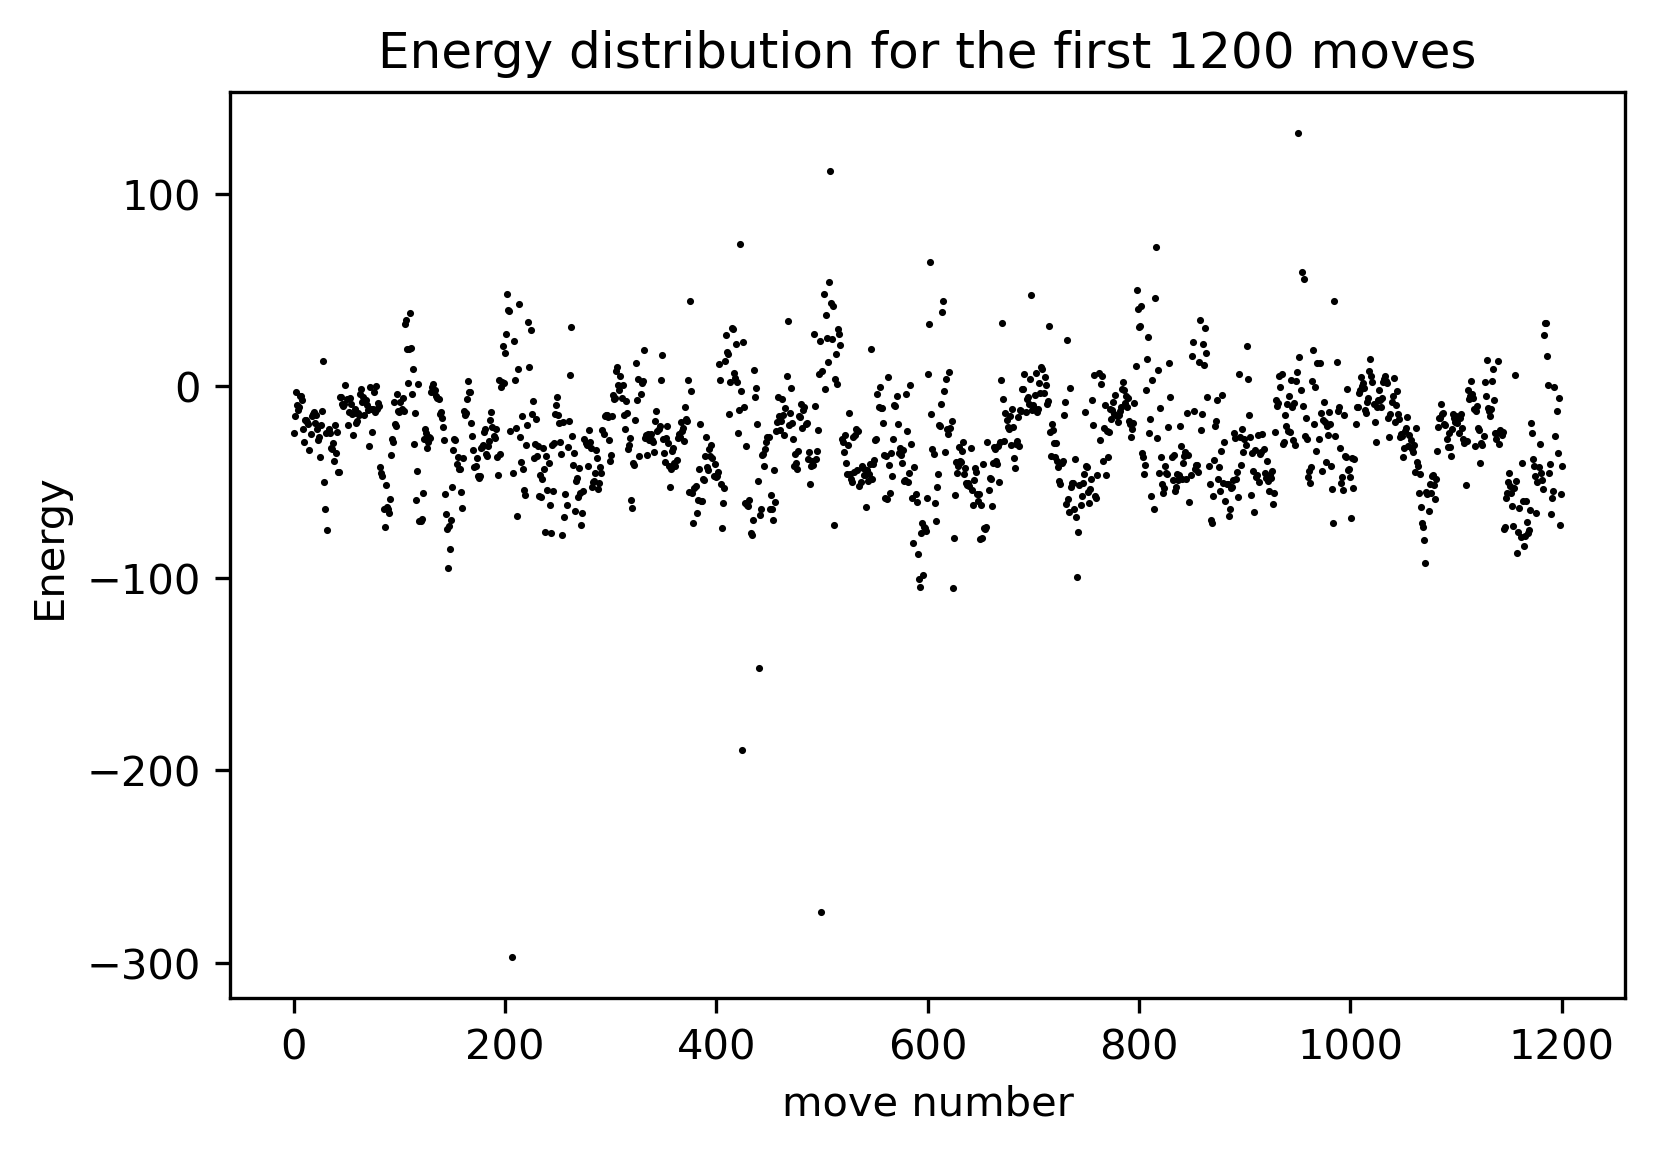

In [91]:
#STAMPA I PRIMI 1200 VALORI
#ASSOMIGLIA MOLTISSIMO A QUELLO DI GUARDIOLA.
#QUESTI SONO CIRCA DUE/TRE CONFIGURAZIONI E BASTA PERò

fig , ax= plt.subplots(dpi=300)
ics=np.linspace(0,1200,1200)
ax.scatter(ics,list_Energytot[0:1200], s=0.5, color='black')
ax.set_xlabel('move number')
ax.set_ylabel('Energy')
plt.title('Energy distribution for the first 1200 moves')
plt.show()
#print(len(ics))

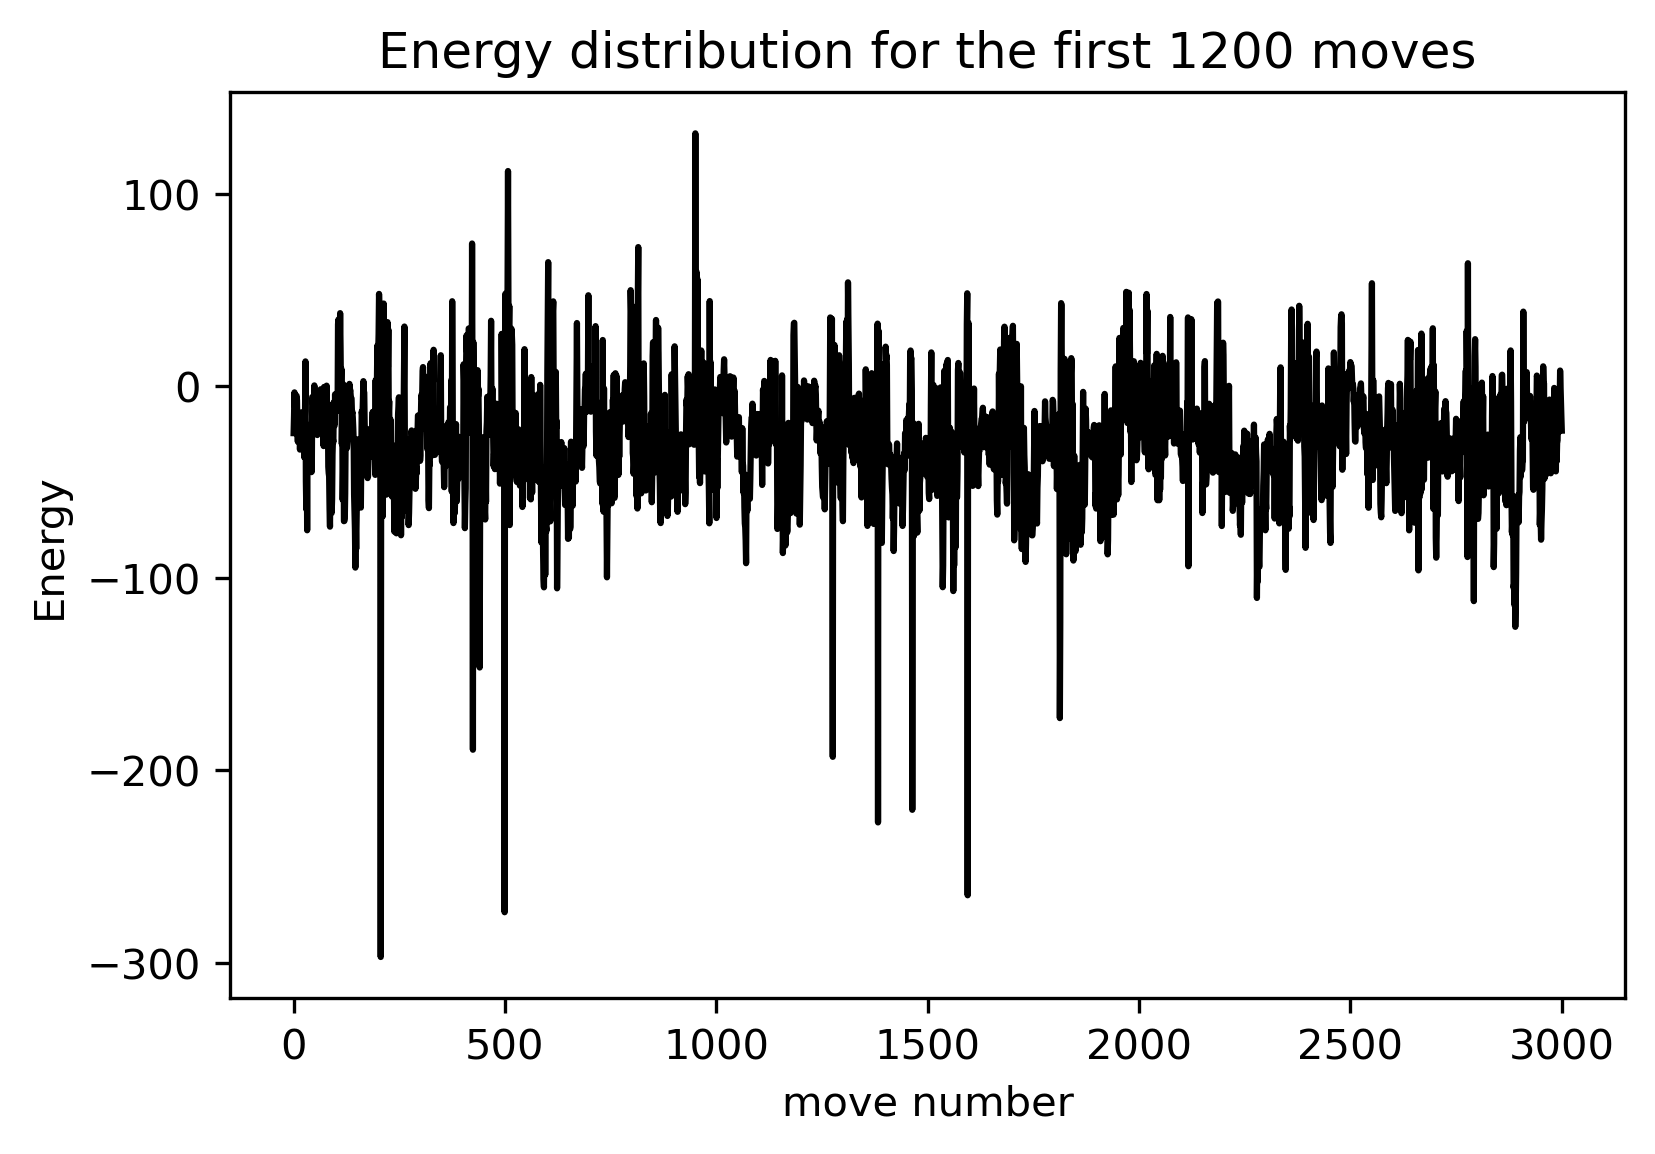

In [94]:
#STAMPA I PRIMI 1200 VALORI
#ASSOMIGLIA MOLTISSIMO A QUELLO DI GUARDIOLA.
#QUESTI SONO CIRCA DUE/TRE CONFIGURAZIONI E BASTA PERò

number=3000

fig , ax= plt.subplots(dpi=300)
ics=np.linspace(0,number,number)
ax.plot(ics,list_Energytot[0:number], color='black')
ax.set_xlabel('move number')
ax.set_ylabel('Energy')
plt.title('Energy distribution for the first 1200 moves')
plt.show()
#print(len(ics))

In [33]:
def Grad(R,i,j,h):
    R_P = R.copy()
    R_M = R.copy()
    R_P[i,j] = R[i,j]+h
    R_M[i,j] = R[i,j]-h
    return ((WF(R_P,Bestpars)-WF(R_M,Bestpars))/WF(R,Bestpars))

In [34]:
def driftF(Grad,i,j,h,WF,R,Par):
    return(2*Grad(R,i,j,h)/WF(R,Par))

In [51]:
#ASSURDAMENTE LUNGO!!!!


def metropolis(totalWalker,referenceEnergy): 
    counter = 0
    #totalWalker.append(R)  #Perchè l'ho fatto?
    #R=R
    R = (np.random.rand(3,A)-0.5)*10*step
    for i in range(0,100):    #A cosa serve questo ciclo?
        R_new = R.copy() + step*(np.random.rand(3,A)-0.5)
        ratio= ((WF(R_new,Bestpar))**2)/((WF(R,Bestpar))**2)
        
        #METROPOLIS QUESTION ------> min(1,ratio)
        
        if ratio <= 0:
            counter+=1
            R=R_new
        elif np.random.random() < math.exp(-ratio):   #Non appendo i vari R a totalWalker?
            counter+=1
            R=R_new 
            
    print ("Acceptance rate =  " + str(counter) + "%" ) 
    variationalTotalEnergy = 0
    variationalSquaredTotalEnergy=0
    
    
    for i in range(40):    #400 = N_c
        variationalEnergy=0
        for j in range(250):
            R_new = R.copy() + step*(np.random.rand(3,A)-0.5)
            ratio= ((WF(R_new,Bestpar))**2)/((WF(R,Bestpar))**2)
        
            #METROPOLIS QUESTION ------> min(1,ratio)
        
            if ratio <= 0:
                R=R_new
            elif np.random.random() < math.exp(-ratio):   #Non appendo i vari R a totalWalker?
                R=R_new 
            
                
                
            variationalEnergy += V(R_new) - K(R_new,Bestpar)/WF(R_new,Bestpar)
        
        variationalTotalEnergy += variationalEnergy/250               #Have to put it in my code
        variationalSquaredTotalEnergy+=(variationalEnergy/250)**2     #Have to put it in my code
        
        totalWalker.append(R)                          #Have to put it in my code(Perchè dopo 2500 cili?)
        
    referenceEnergy.append(variationalTotalEnergy/40)      #Have to put it in my code 
    standard_error = math.sqrt( ( (variationalSquaredTotalEnergy/40) - ( (variationalTotalEnergy/40)**2) ) /40)  
    print("Current variational Energy : "+str( variationalTotalEnergy / 40 ))
    print("Standard Error is " + str(standard_error))

In [52]:
totalWalker=[]
referenceEnergy=[]
metropolis(totalWalker,referenceEnergy)
print(totalWalker)

Acceptance rate =  44%


/var/folders/w2/vjpbmwkj10s_w78j4p9hxlyh0000gn/T/ipykernel_1421/704514603.py:28: RuntimeWarning: invalid value encountered in double_scalars
  ratio= ((WF(R_new,Bestpar))**2)/((WF(R,Bestpar))**2)
/var/folders/w2/vjpbmwkj10s_w78j4p9hxlyh0000gn/T/ipykernel_1421/704514603.py:28: RuntimeWarning: divide by zero encountered in double_scalars
  ratio= ((WF(R_new,Bestpar))**2)/((WF(R,Bestpar))**2)


Current variational Energy : -10338.03612778987
Standard Error is 172.49482507713944
[array([[  4.83451575,   7.27730251,   4.04895811,  -4.08122603],
       [  0.38467361,   9.22514286,  -1.72969161,  -4.0241074 ],
       [ -9.09225714, -14.44678435,   3.94857835,  15.78559104]]), array([[  4.72378933,   9.3627363 ,   4.02303299,  -7.3353782 ],
       [ -0.94677074,  10.89393271,  -2.64981692,  -6.36955891],
       [-11.13459316, -16.42027977,   6.83593334,  18.16896863]]), array([[  4.72378933,   9.3627363 ,   4.02303299,  -7.3353782 ],
       [ -0.94677074,  10.89393271,  -2.64981692,  -6.36955891],
       [-11.13459316, -16.42027977,   6.83593334,  18.16896863]]), array([[  4.72378933,   9.3627363 ,   4.02303299,  -7.3353782 ],
       [ -0.94677074,  10.89393271,  -2.64981692,  -6.36955891],
       [-11.13459316, -16.42027977,   6.83593334,  18.16896863]]), array([[  4.72378933,   9.3627363 ,   4.02303299,  -7.3353782 ],
       [ -0.94677074,  10.89393271,  -2.64981692,  -6.3695589

In [ ]:
#CREATE A PROPOSAL OF NC CONFIGURATION UNCORRELATED AND DISTRIBITEDà
#ACCORDING TO MODULO QUADRO DI TRIAL FUNCTION
#FISSA UN TRIAL ENERGY 


In [30]:
#THAT'S THE GRADIENT OF THE TRIAL FUNCTION
#TO ABTAIN THE DRIFT ONE I HAVE TO MULTIPLY BY TWO AND DIVIDE BY THE TRIAL FUNCTION(WF)
#then I have to create a function for the muktivariate gaussian with zero mean value
#drifting things, calculating the ratios and aply the metropolis question(look at the most
#recent file saved on safari to understand the roadmap)

def Grad(R,i,j,h):
    R_P = R.copy()
    R_M = R.copy()
    R_P[i,j] = R[i,j]+h
    R_M[i,j] = R[i,j]-h
    return ((WF(R_P,gamma,a,beta)-WF(R_M,gamma,a,beta))/WF(R,gamma,a,beta))

In [ ]:
def LocalEnergy(V,K,WF):
    return E_loc = V - (K/WF) #Questa è la standard loal energy noti i parametri con certezza

#E_loc = V*(WF/WF)**2 - K*WF/WF**2    #Questa è la local energy nel caso di parametri variabili
#D=(WF/WF)**2
#Meanenergy=E_loc/D

#in realtà a denominatore le wf hanno altri parametri diversi da quella del numeratore
#tuttavia quando l'algoritmo comincia a convergere i parametri diventano uguali e quindi
#sia D che la parte che moltiplica V diventano uno, mentre quella che moltiplica il 
#termine cinetico rimane divisa per wf come dovrebbe essere nel calcolo della local energy